# Import libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import re

# Load dataset

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


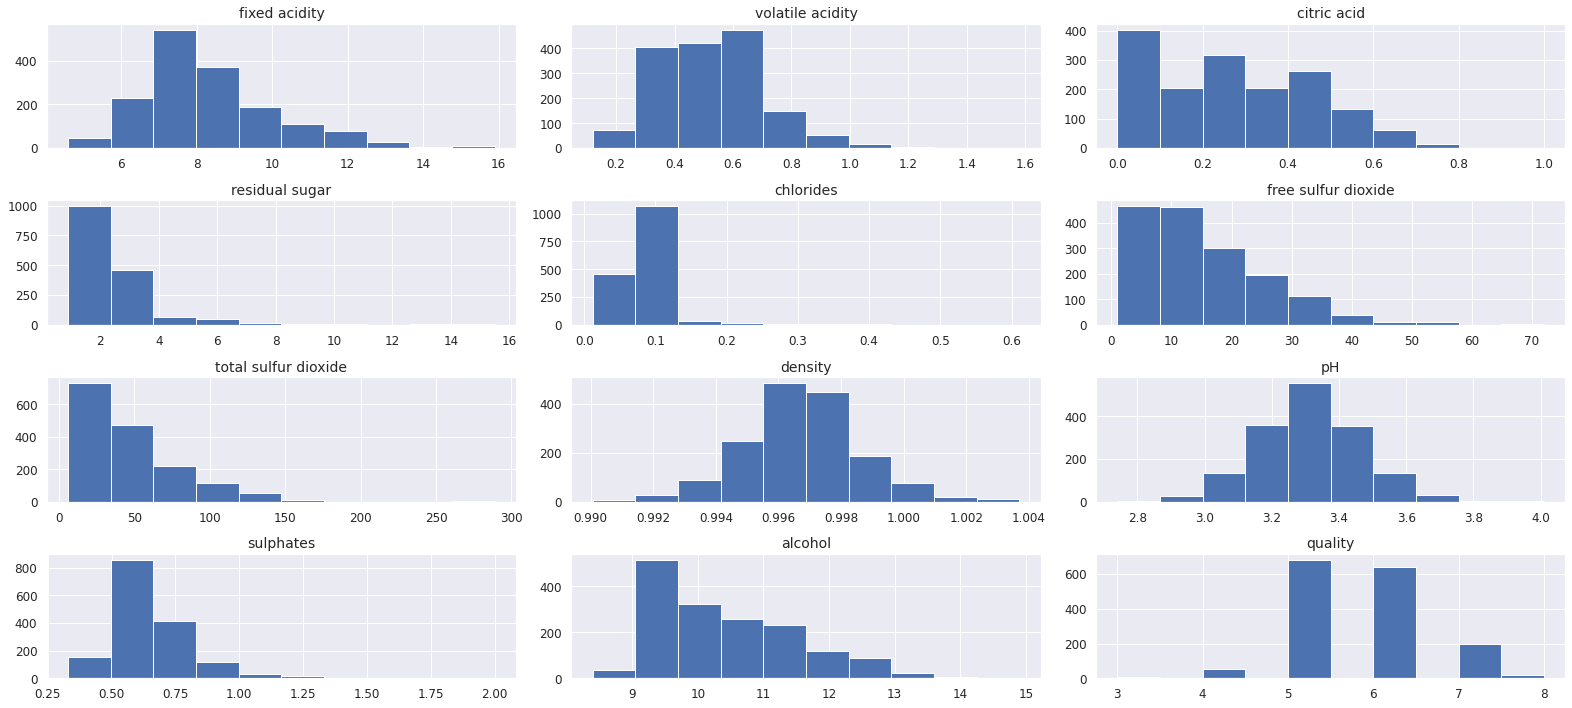

In [8]:
def display_dataset_distributions(dataset,bins=10):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10),bins=bins)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
display_dataset_distributions(df)

# Split into Train Test

In [9]:
df = df[df['quality'].notna()] # Drop row when output is NaN
print('quality NaN = '+str(df['quality'].isna().sum()))

quality NaN = 0


In [10]:
from sklearn.model_selection import train_test_split

y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['quality'], axis=1),
    y,
    test_size=0.15,
    random_state=0,
    stratify=y
    )

print("X_train.shape, X_test.shape = ")
print(X_train.shape, X_test.shape)

# print("% of quality in original dataset: "+str((df['RainTomorrow']=='Yes').sum()/df.shape[0]*100))
# print("% of quality in y_train: "+str((y_train=='Yes').sum()/y_train.shape[0]*100))
# print("% of quality in y_test: "+str((y_test=='Yes').sum()/y_test.shape[0]*100))

X_train.shape, X_test.shape = 
(1359, 11) (240, 11)


In [11]:
# Join to work easier
X_train['quality']=y_train

In [13]:
print('% of NaN in each column')
print(((1-df.count()/df.count().max())*100))

% of NaN in each column
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64


# Feature Selection / New Features

(<matplotlib.axes._subplots.AxesSubplot at 0x28b805b99a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b805b99a0>)

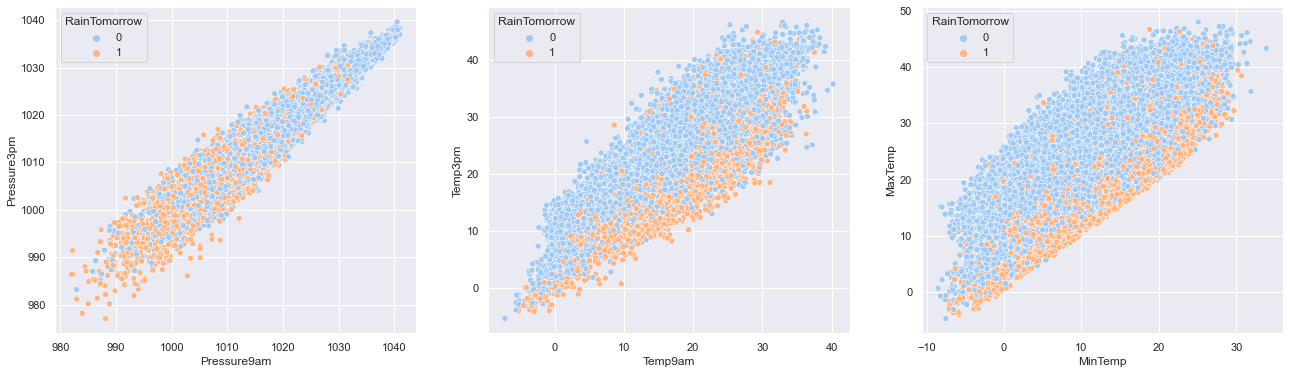

In [20]:
fig, axs = plt.subplots(1, 3,figsize=(22,6))

plt.subplot(1,3,1), sns.scatterplot(x='Pressure9am',y='Pressure3pm',hue=y_train,palette='pastel',data=X_train)
plt.subplot(1,3,2), sns.scatterplot(x='Temp9am',y='Temp3pm',hue=y_train,palette='pastel',data=X_train)
plt.subplot(1,3,3), sns.scatterplot(x='MinTemp',y='MaxTemp',hue=y_train,palette='pastel',data=X_train)

In [21]:
# Pressures
# Mean of colums. When one of the columns is NaN, the mean takes the value of the other column
X_train.Pressure3pm.fillna(X_train.Pressure9am, inplace=True)
X_train.Pressure9am.fillna(X_train.Pressure3pm, inplace=True)
press_mean = (X_train['Pressure3pm'] + X_train['Pressure9am'])/2
X_train['PressureMean'] = press_mean
X_train.drop('Pressure3pm', inplace=True, axis=1)
X_train.drop('Pressure9am', inplace=True, axis=1)

# Temperatures
temp_diff = X_train['Temp3pm'] - X_train['Temp9am']
X_train['TempDiff'] = temp_diff
# Mean of colums. When one of the columns is NaN, the mean takes the value of the other column
X_train.Temp3pm.fillna(X_train.Temp9am, inplace=True)
X_train.Temp9am.fillna(X_train.Temp3pm, inplace=True)
temp_mean = (X_train['Temp3pm'] + X_train['Temp9am'])/2
X_train['TempMean'] = temp_mean
X_train.drop('Temp3pm', inplace=True, axis=1)
X_train.drop('Temp9am', inplace=True, axis=1)

# Temperatures max-min
max_temp_diff = X_train['MaxTemp'] - X_train['MinTemp']
X_train['TempMaxDiff'] = max_temp_diff
X_train.drop('MinTemp', inplace=True, axis=1)

TempMean    120789
dtype: int64
MaxTemp    120789
dtype: int64


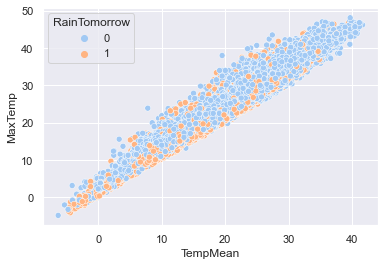

In [22]:
sns.scatterplot(x='TempMean',y='MaxTemp',hue=y_train,palette='pastel',data=X_train)
print(X_train[['TempMean']].isna().count())
print(X_train[['MaxTemp']].isna().count())

In [23]:
X_train.drop('MaxTemp', inplace=True, axis=1)
X_train.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff
14293,Moree,0.2,5.0,33.0,3.0,7.0,17.0,20.0,82.0,26.0,...,0,1.0,0.0,0.0,0.0,0.0,1012.10,7.8,23.20,14.4
910,Albury,0.0,1.0,17.0,NaN,15.0,0.0,6.0,81.0,50.0,...,3,0.0,0.0,0.0,1.0,0.0,1036.25,10.5,10.85,15.7
125054,SalmonGums,0.2,10.0,37.0,8.0,9.0,17.0,19.0,89.0,78.0,...,1,0.0,1.0,0.0,0.0,0.0,NaN,4.1,11.95,9.9
14892,Moree,0.2,13.0,52.0,1.0,1.0,20.0,15.0,64.0,36.0,...,0,1.0,0.0,0.0,0.0,0.0,1014.90,6.1,27.05,14.0
106576,Woomera,0.0,14.0,30.0,14.0,9.0,19.0,13.0,35.0,16.0,...,3,0.0,0.0,0.0,1.0,0.0,1020.75,7.1,24.75,16.6


(<matplotlib.axes._subplots.AxesSubplot at 0x28bf1ff4c70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28bf1ff4c70>)

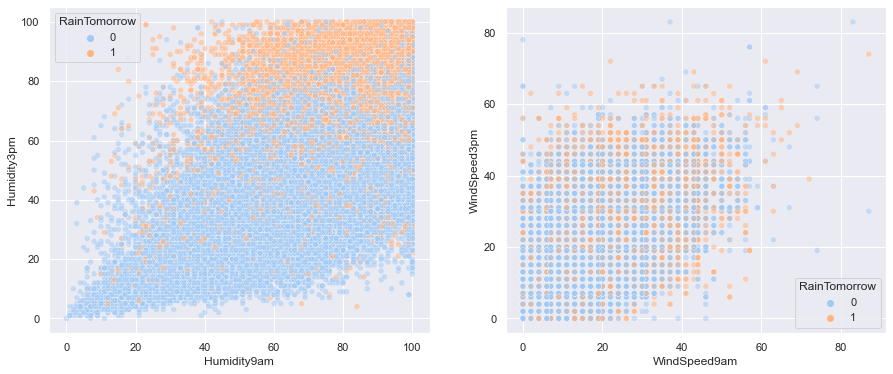

In [24]:
fig, axs = plt.subplots(1, 3,figsize=(15,6))

plt.subplot(1,2,1), sns.scatterplot(x='Humidity9am',y='Humidity3pm',hue=y_train,palette='pastel',alpha = .5, data=X_train)
plt.subplot(1,2,2), sns.scatterplot(x='WindSpeed9am',y='WindSpeed3pm',hue=y_train,palette='pastel',alpha = .5,data=X_train)

# Outliers

In [25]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    # histograma
    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    # qqplot    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

    fig.suptitle(variable, fontsize=16)

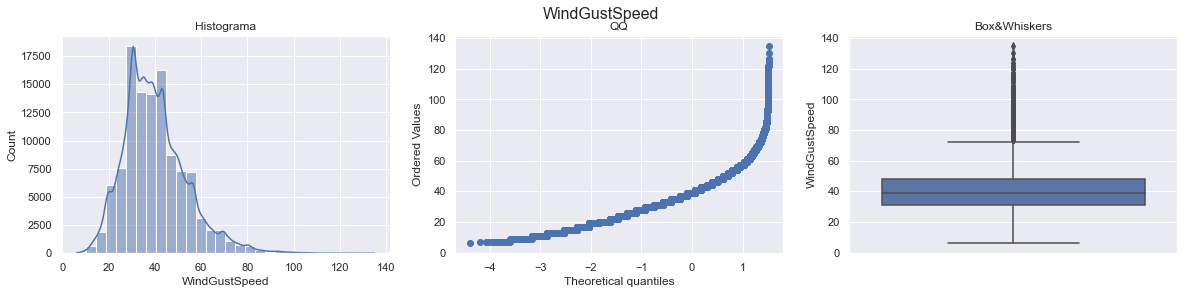

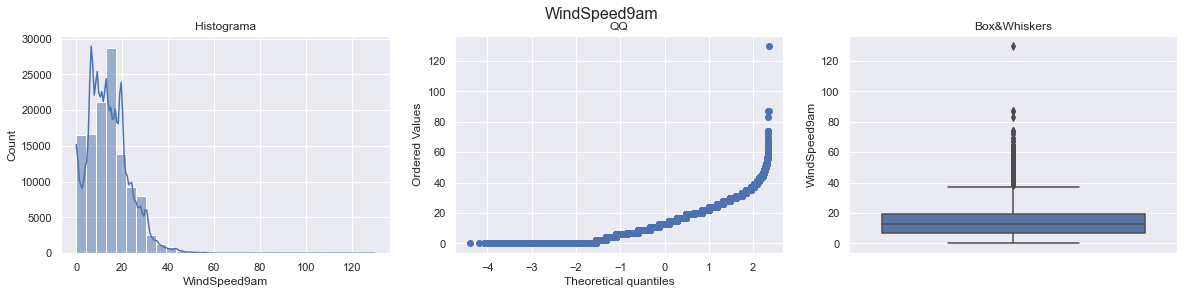

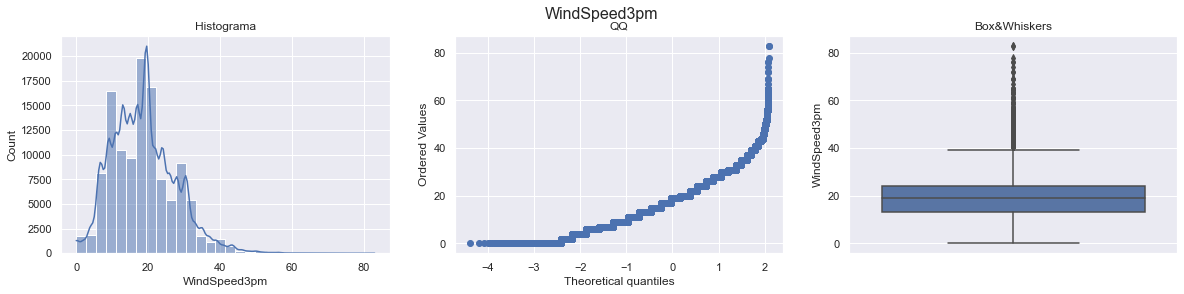

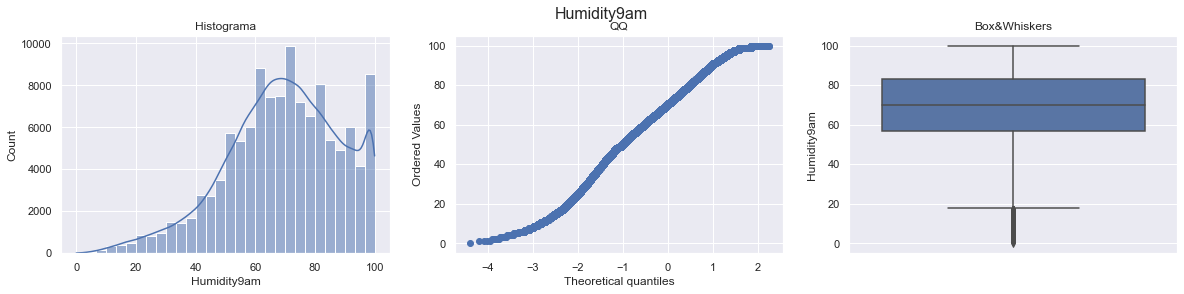

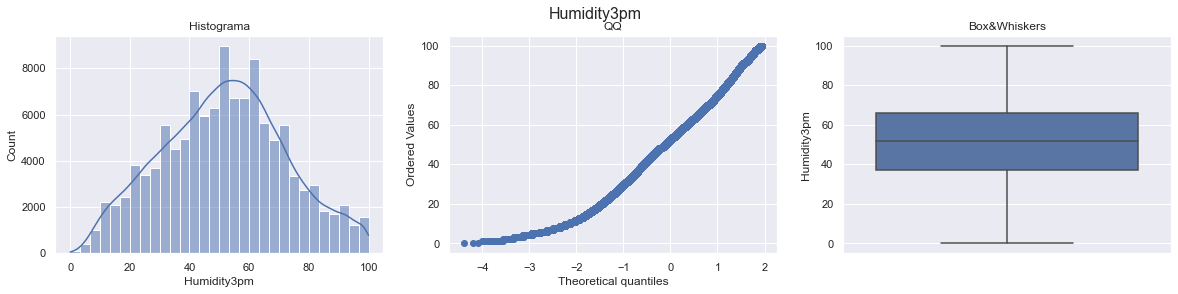

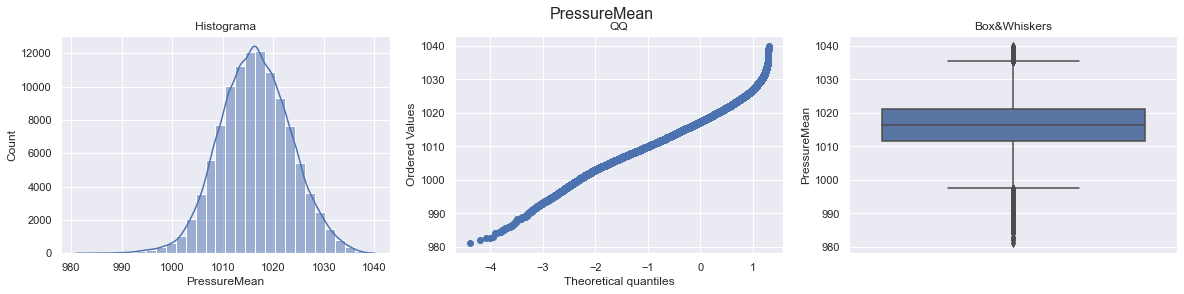

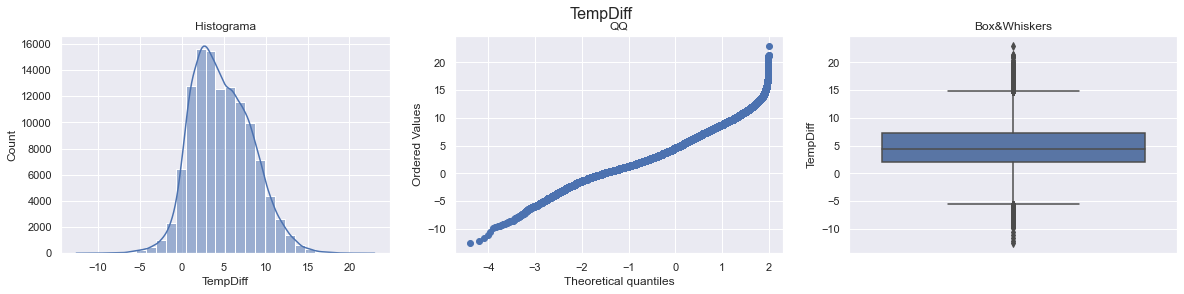

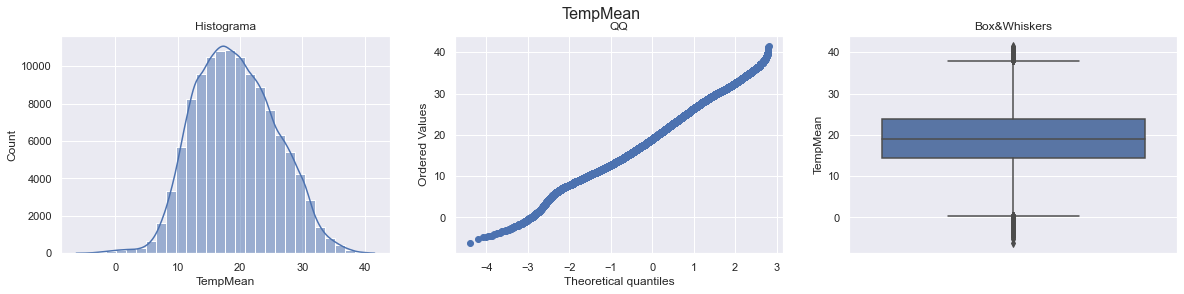

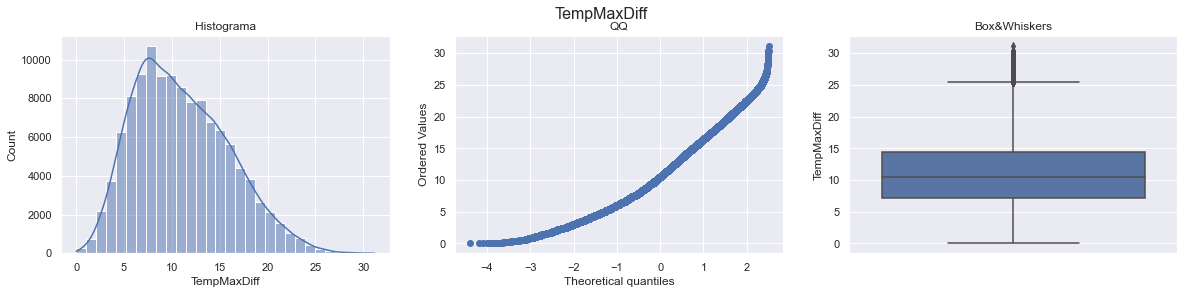

In [26]:
norm_col = [
    # 'Rainfall', 
    'WindGustSpeed', 
    'WindSpeed9am', 
    'WindSpeed3pm', 
    'Humidity9am',
    'Humidity3pm', 
    # 'RainfallYesterday',
    'PressureMean',
    'TempDiff', 
    'TempMean', 
    'TempMaxDiff'
]

for col in norm_col:
    outlier_diagnostic_plots(X_train, col)

In [27]:
# Trim outlier
# outliers_total = np.array(np.repeat(False,X_train.shape[0]))
# for col in cloumns_plot:
    
#     upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 2.)
#     outliers = np.where(X_train[col] > upper_limit, True,
#                         np.where(X_train[col] < lower_limit, True, False))                        
#     outliers_total = np.logical_or(outliers_total, outliers)
    
#     print(str(col) + " outliers = "+str(outliers.sum()))

# print("Total outliers = "+str(outliers_total.sum()))

# X_train_trimmed = X_train.loc[~(outliers_total)]
# for col in cloumns_plot:
#     outlier_diagnostic_plots(X_train_trimmed, col)

# Capping outlier

# X_train_capped = X_train.copy()
# for col in cloumns_plot:
    
#     upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 1.5)
#     X_train_capped[col] = np.where(X_train[col] > upper_limit, upper_limit,
#                           np.where(X_train[col] < lower_limit, lower_limit, X_train_capped[col]))

# for col in cloumns_plot:
#     outlier_diagnostic_plots(X_train_capped, col)

    
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary
    
def transform_outliers(df, norm_col, threshold_capped=1.5, threshold_trimmed=1.8, use_manual_limits=False, 
                        upper_limit_trim=0, lower_limit_trim=0, upper_limit_cap=0, lower_limit_cap=0):
    # Trimming and capping outliers
    outliers_total = np.array(np.repeat(False,df.shape[0]))
    X_train_capped = df.copy()
    for col in norm_col:
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_trim, lower_limit_trim
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_trimmed)

        outliers = np.where(df[col] > upper_limit, True,
                            np.where(df[col] < lower_limit, True, False))                        
        outliers_total = np.logical_or(outliers_total, outliers)
        
        print(str(col) + " outliers = "+str(outliers.sum()))
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_cap, lower_limit_cap
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_capped)

        X_train_capped[col] = np.where(df[col] > upper_limit, upper_limit,
                            np.where(df[col] < lower_limit, lower_limit, X_train_capped[col]))

    print("Total outliers = "+str(outliers_total.sum()))
    X_train_trimmed = X_train_capped.loc[~(outliers_total)]

    return X_train_trimmed

WindGustSpeed outliers = 1429
WindSpeed9am outliers = 1133
WindSpeed3pm outliers = 1093
Humidity9am outliers = 298
Humidity3pm outliers = 0
PressureMean outliers = 289
TempDiff outliers = 257
TempMean outliers = 52
TempMaxDiff outliers = 73
Total outliers = 3657


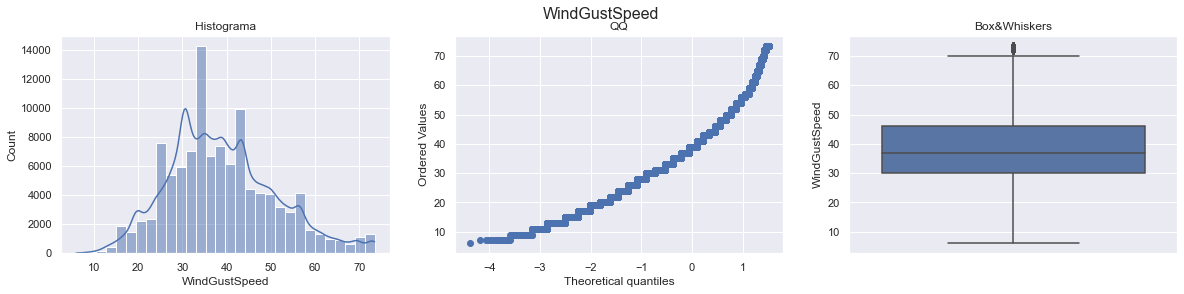

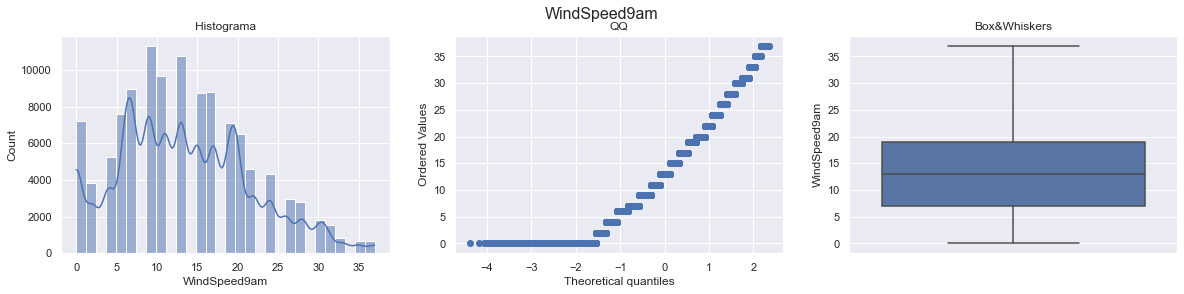

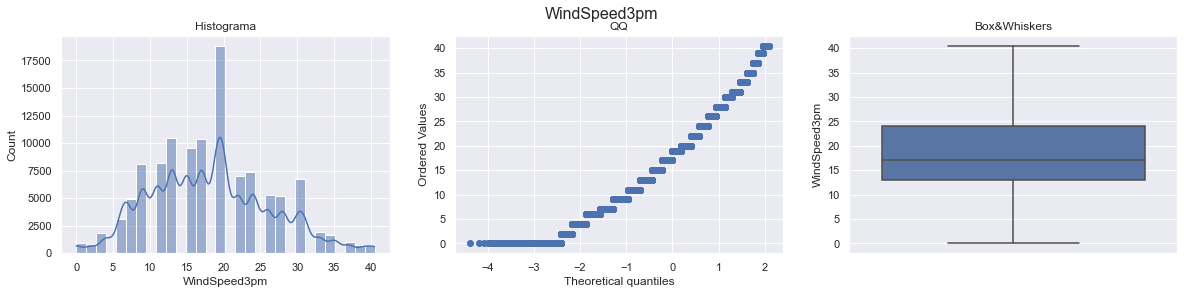

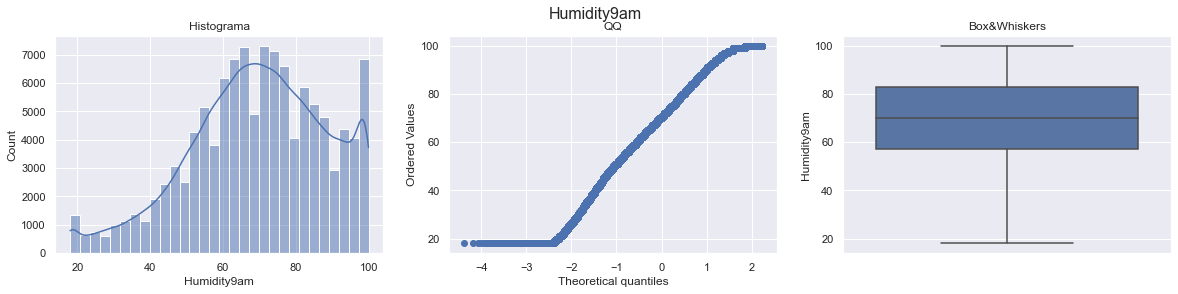

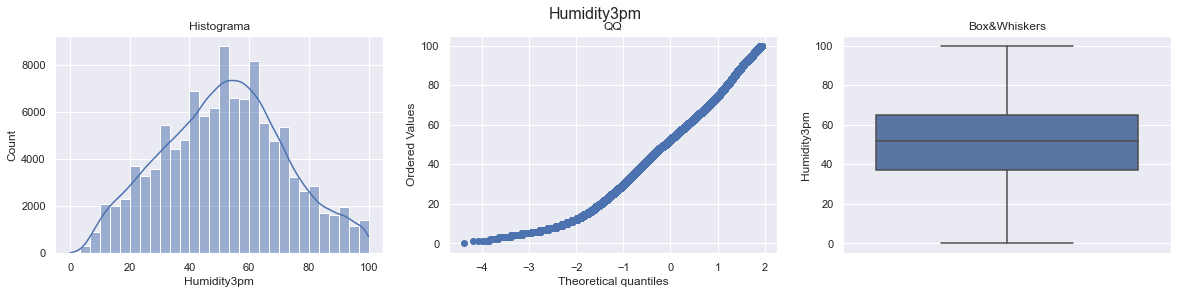

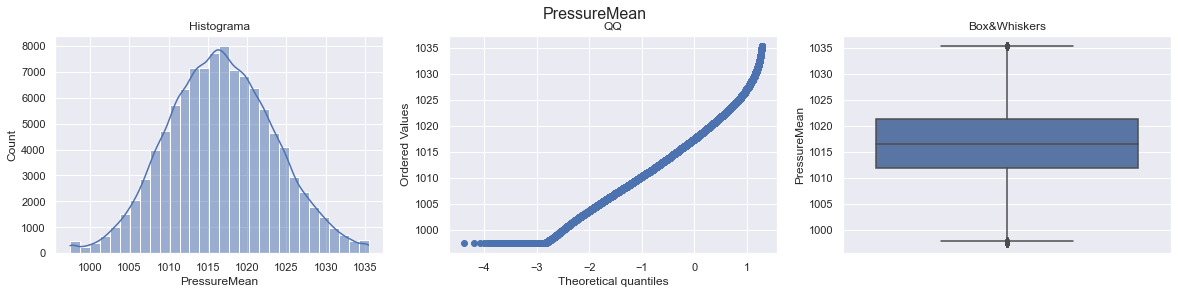

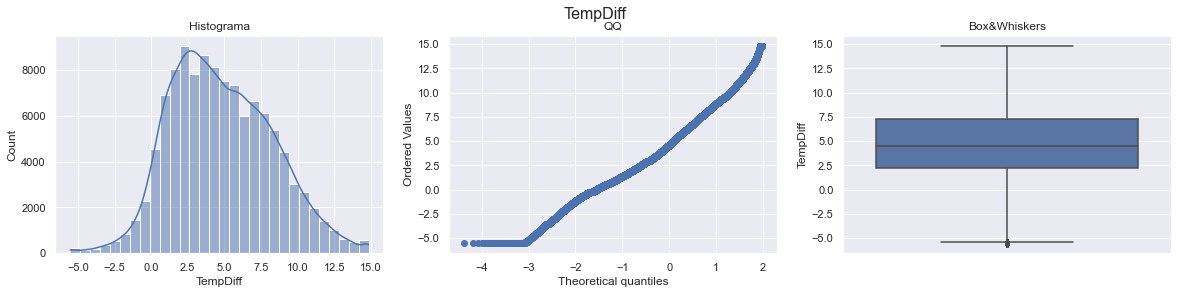

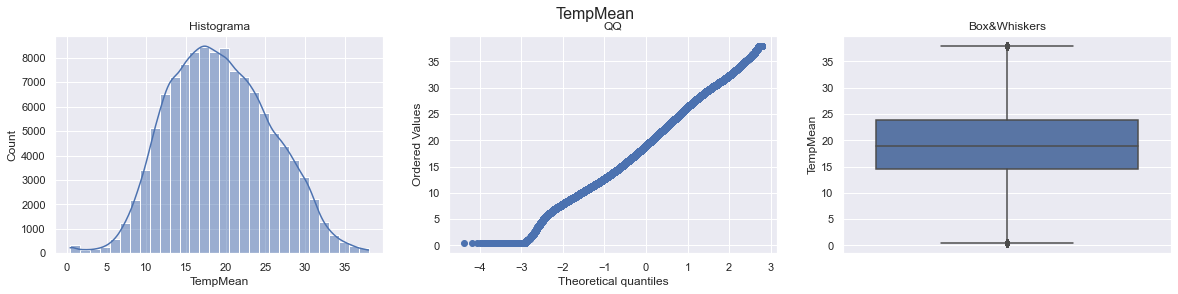

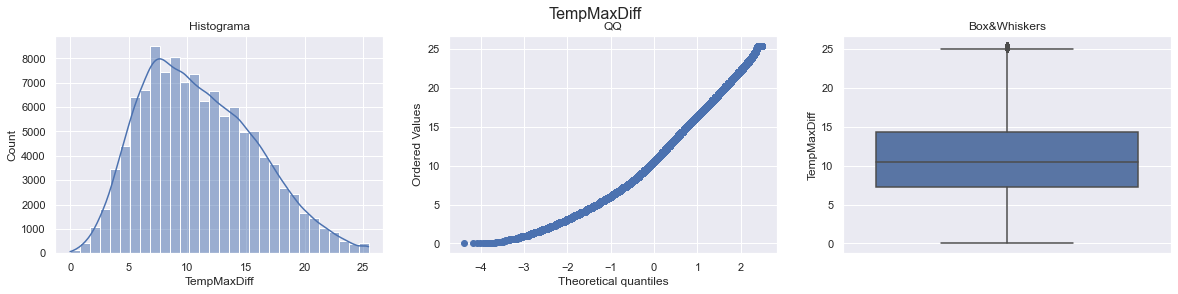

In [28]:
X_train_trimmed = transform_outliers(X_train, norm_col)

for col in norm_col:
    outlier_diagnostic_plots(X_train_trimmed, col)
    
X_train = X_train_trimmed

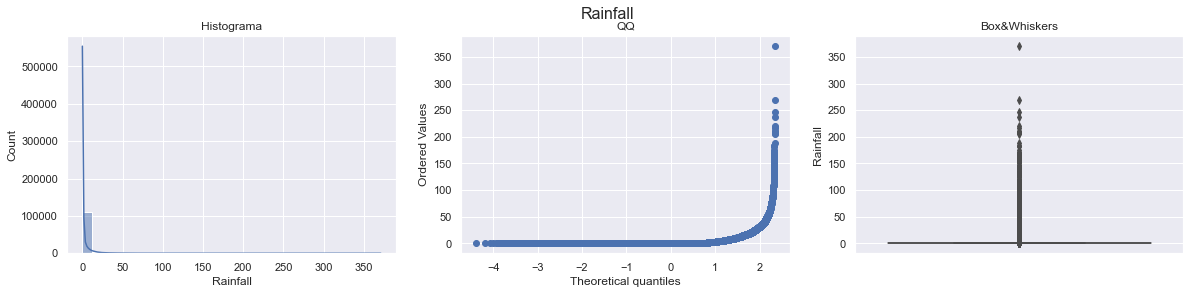

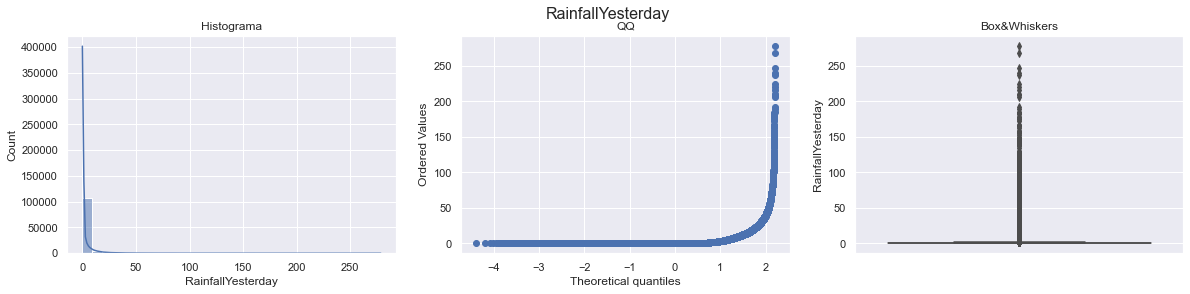

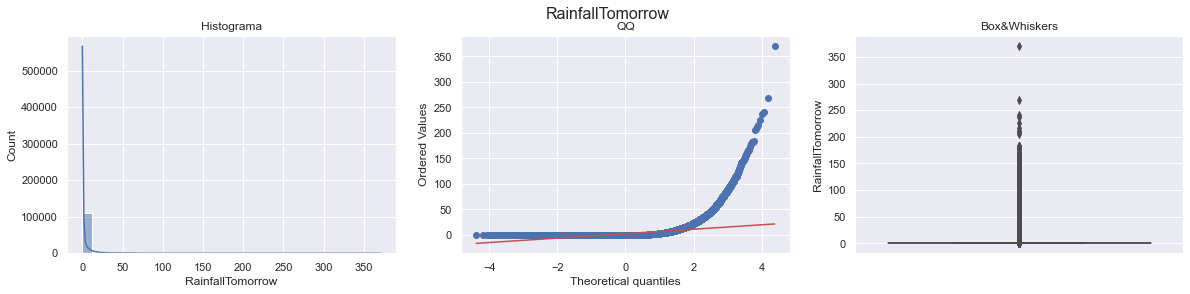

In [29]:
norm_rainfall = ['Rainfall','RainfallYesterday','RainfallTomorrow']
                        
for col in norm_rainfall:
    outlier_diagnostic_plots(X_train, col)

Rainfall outliers = 4686
RainfallYesterday outliers = 4813
RainfallTomorrow outliers = 4660
Total outliers = 11846


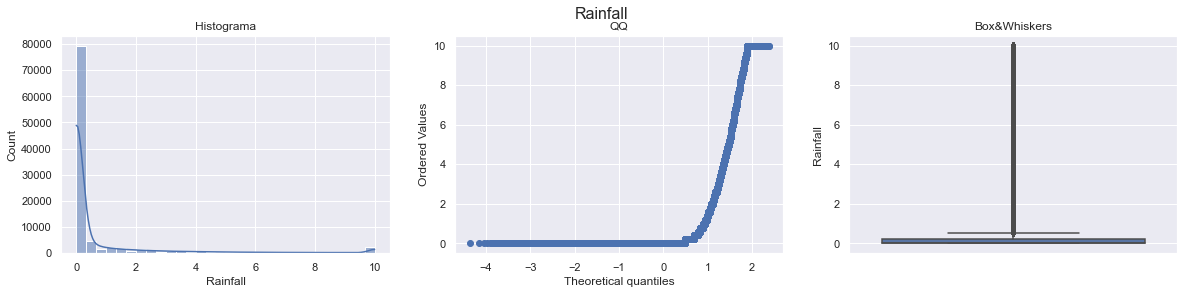

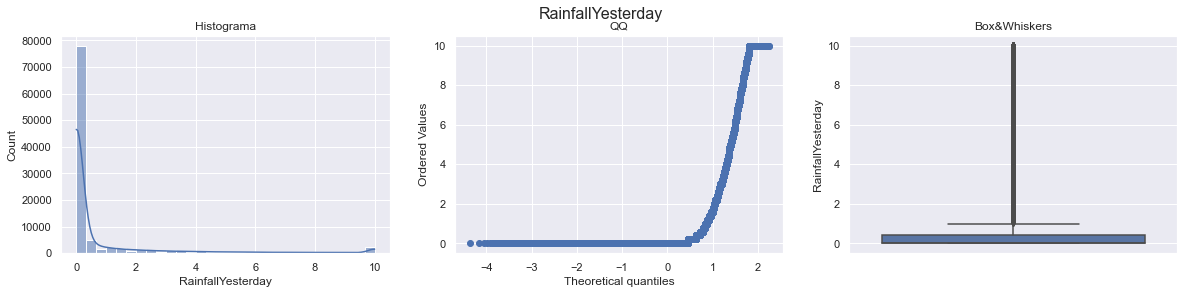

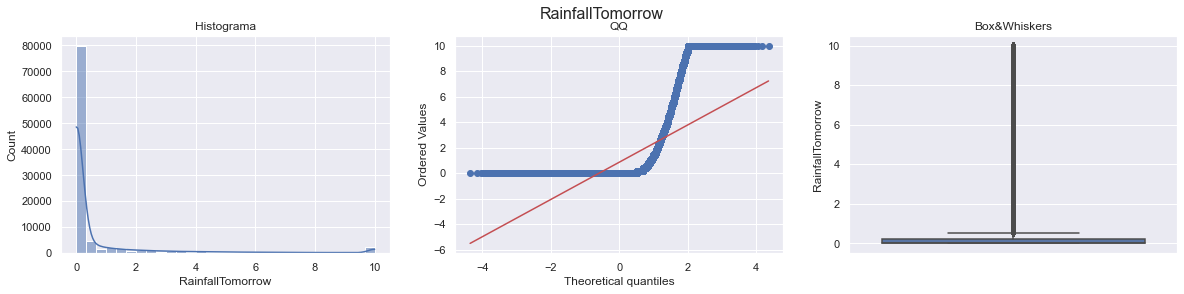

In [30]:
X_train_trimmed = transform_outliers(X_train, norm_rainfall,use_manual_limits=True, 
                        upper_limit_trim=15, lower_limit_trim=0, upper_limit_cap=10, lower_limit_cap=0)
for col in norm_rainfall:
    outlier_diagnostic_plots(X_train_trimmed, col)
    
X_train = X_train_trimmed

# Scaled

In [31]:
scaled_columns = [
    'Rainfall', 
    'WindGustSpeed',
    'WindSpeed9am', 
    'WindSpeed3pm', 
    'Humidity9am',
    'Humidity3pm', 
    'RainfallYesterday',
    'RainfallTomorrow',
    'PressureMean', 
    'TempDiff', 
    'TempMean', 
    'TempMaxDiff'
]

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[scaled_columns] = scaler.fit_transform(X_train[scaled_columns])
X_train[scaled_columns].head(3)

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainfallYesterday,RainfallTomorrow,PressureMean,TempDiff,TempMean,TempMaxDiff
910,-0.399011,-1.801820,-1.638667,-1.487269,0.702493,0.022419,-0.410322,-0.401196,2.74747,1.571633,-1.316965,0.876093
125054,-0.304513,-0.127871,0.440678,0.112725,1.130916,1.434825,-0.318982,-0.122240,NaN,-0.272716,-1.146049,-0.322330
14892,-0.304513,1.127590,0.807622,-0.379581,-0.207906,-0.683783,0.046381,-0.122240,-0.32298,0.303643,1.200166,0.524831


# Imputation

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallYesterday,PressureMean,TempDiff,TempMean,TempMaxDiff
0,Adelaide,57,16,16,201,11,4,4,5,4,57,81,2,8,0,3
1,Albany,11,2225,2225,186,572,42,527,31,516,11,15,14,514,21,62
2,Albury,15,3,3,404,31,4,2,2,0,15,18,0,2,0,4
3,AliceSprings,3,32,32,188,2,2,1,1,2,3,6,1,1,0,2
4,BadgerysCreek,42,15,15,308,48,19,16,18,19,42,49,104,24,3,12
5,Ballarat,7,18,18,79,12,8,2,15,3,7,8,14,9,2,2
6,Bendigo,3,32,31,198,33,3,2,3,1,3,4,5,1,0,2
7,Brisbane,20,9,9,49,17,0,0,2,6,20,25,0,7,1,9
8,Cairns,16,12,12,25,2,0,1,0,0,16,19,0,0,0,1
9,Canberra,9,265,263,414,182,180,178,49,11,9,12,169,18,0,6


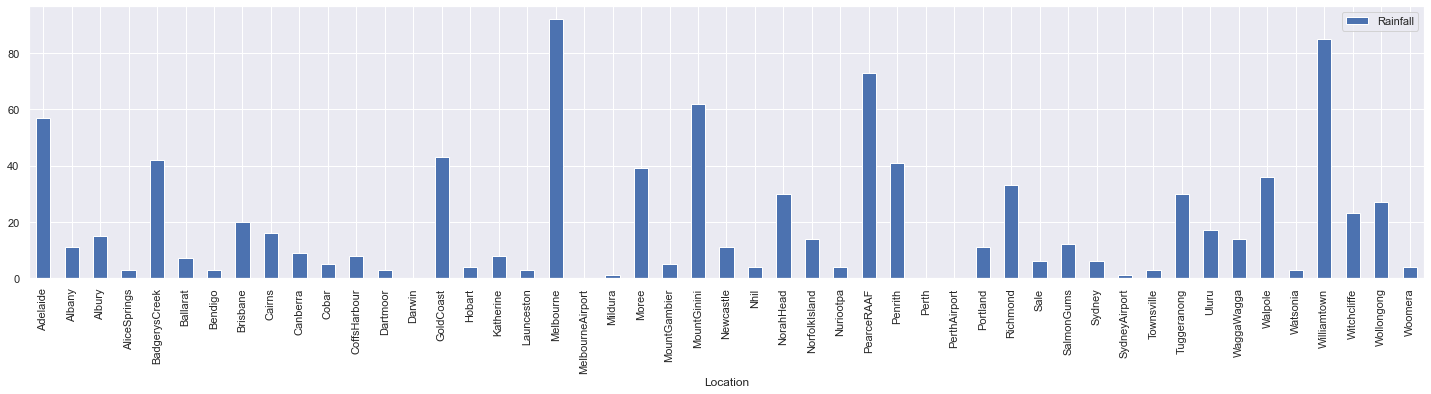

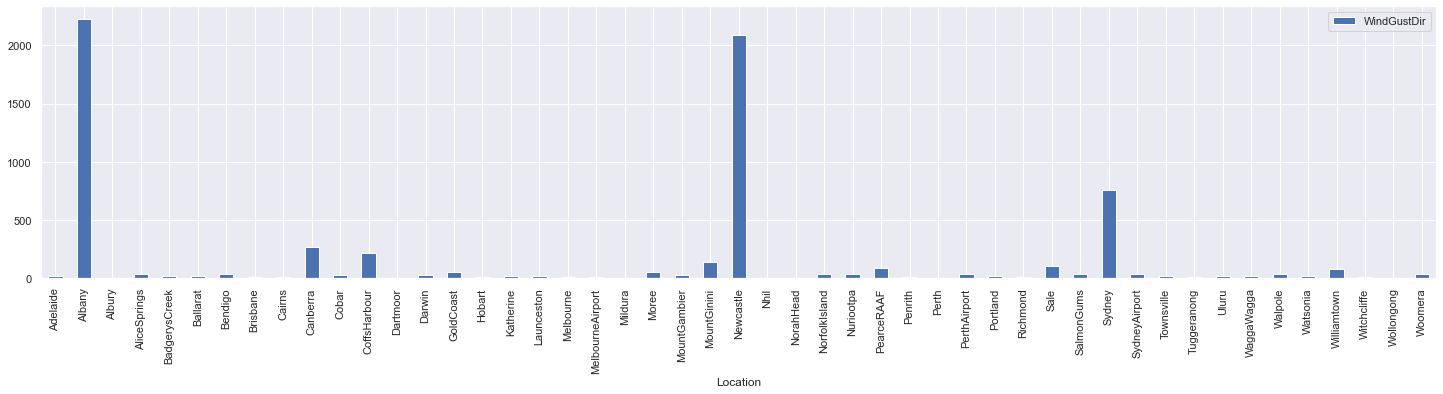

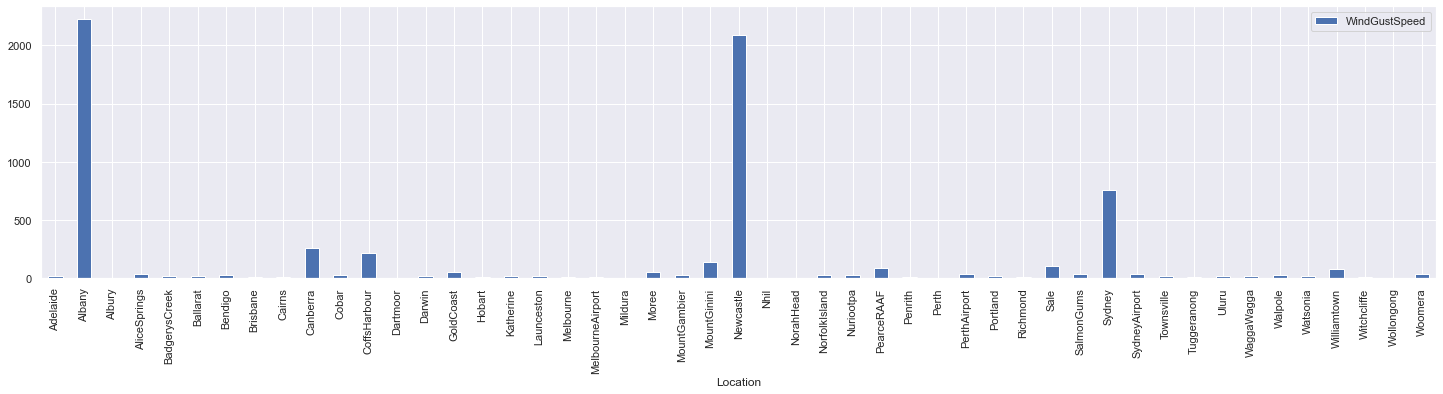

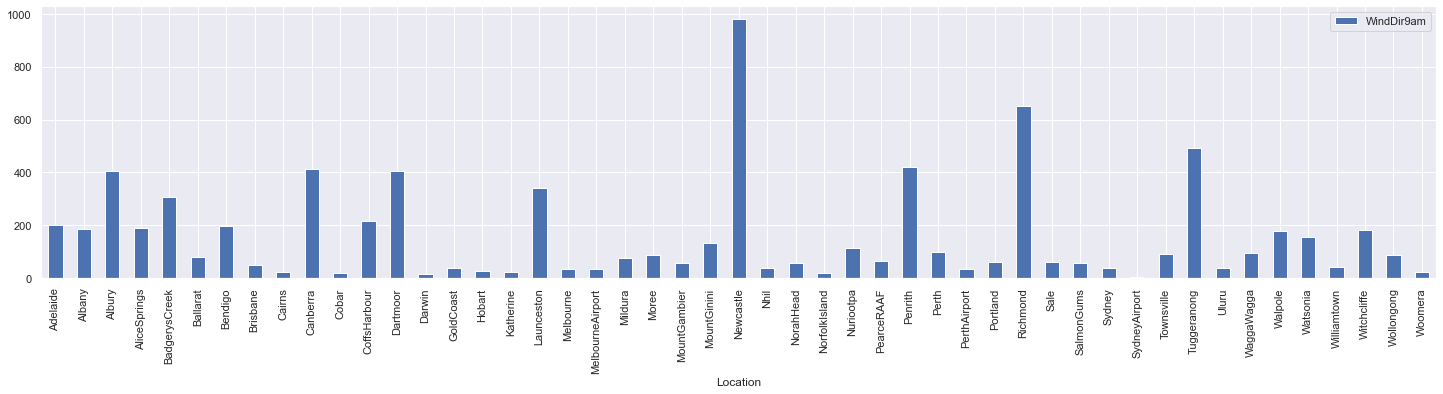

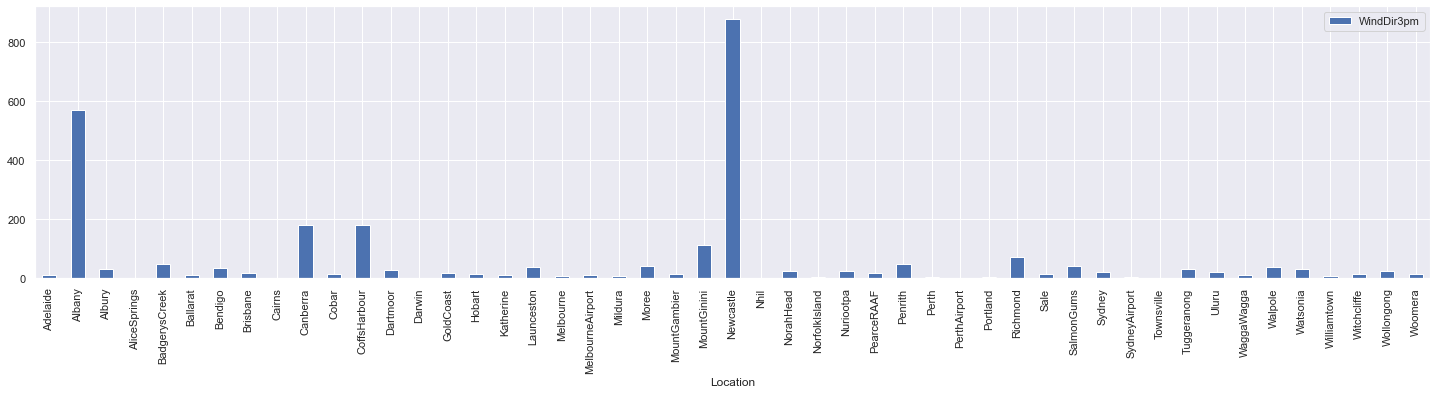

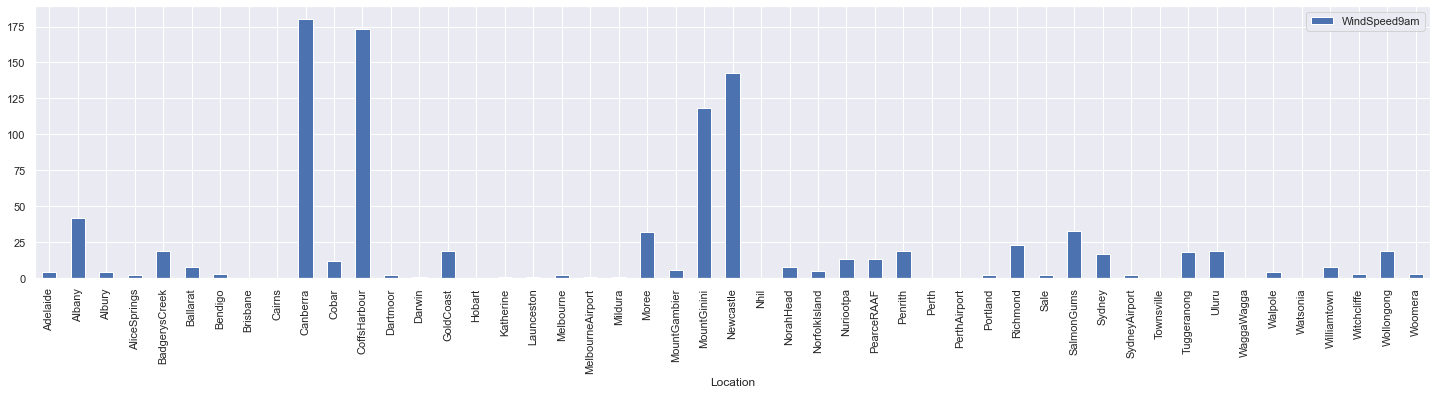

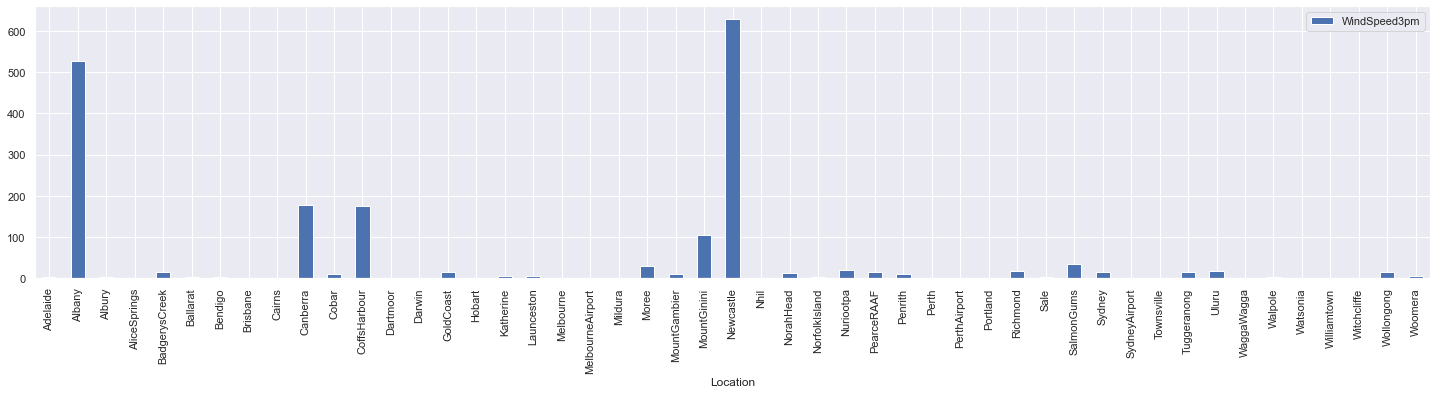

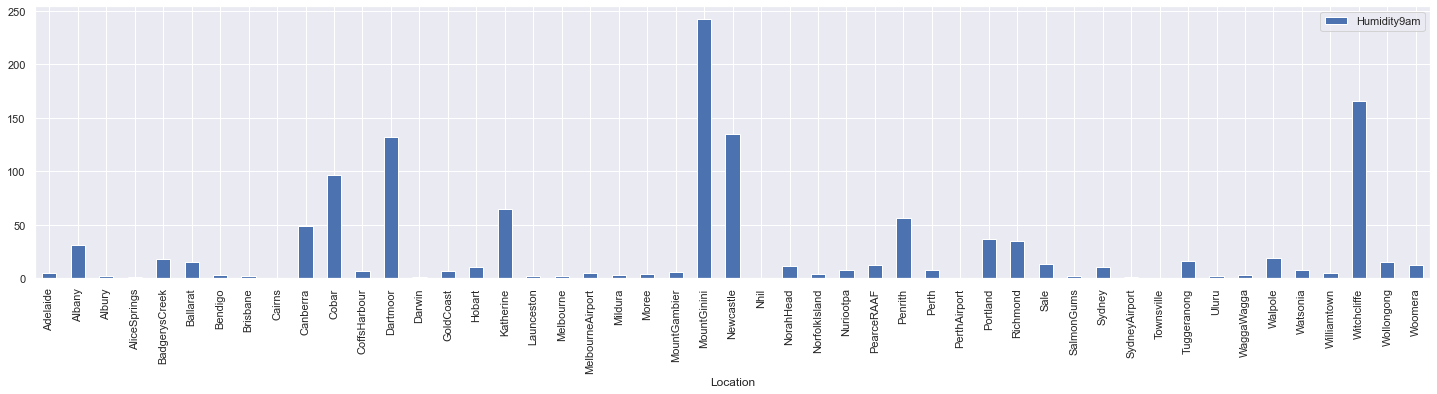

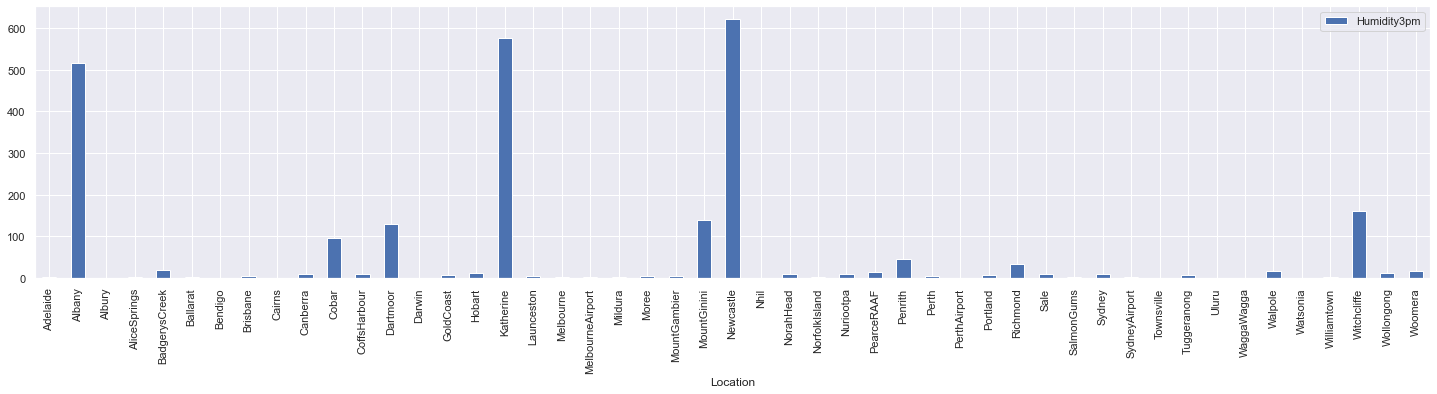

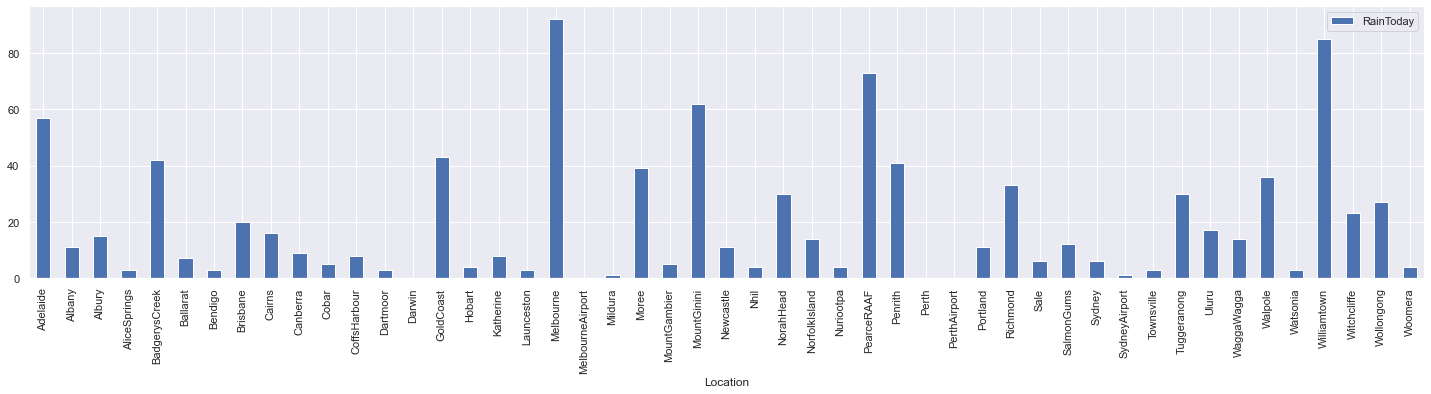

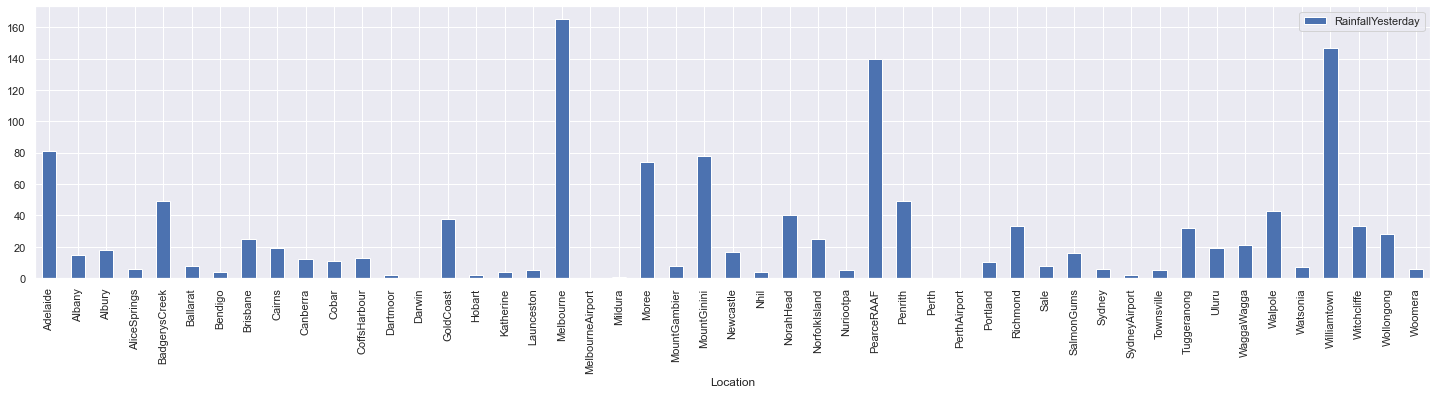

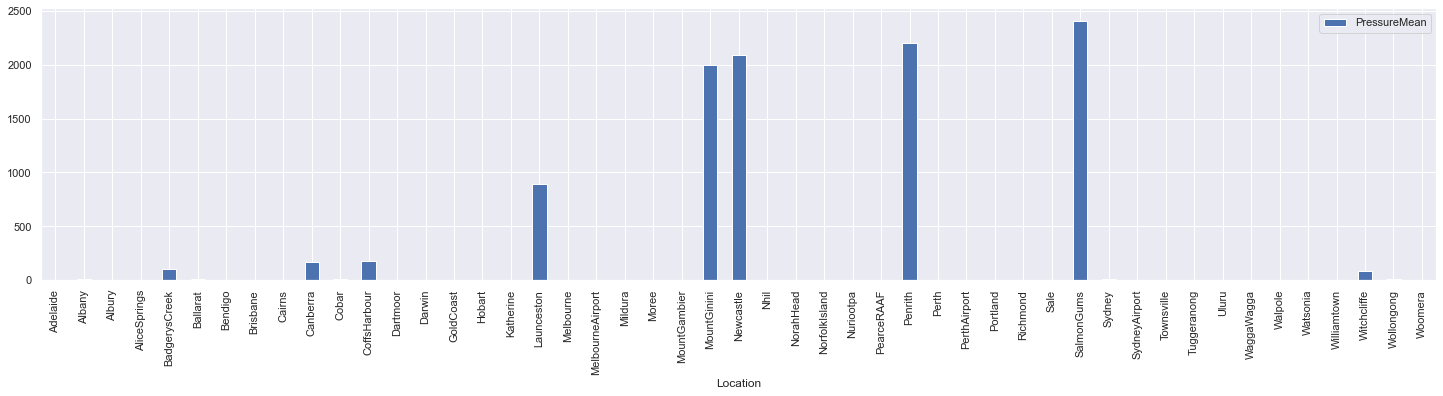

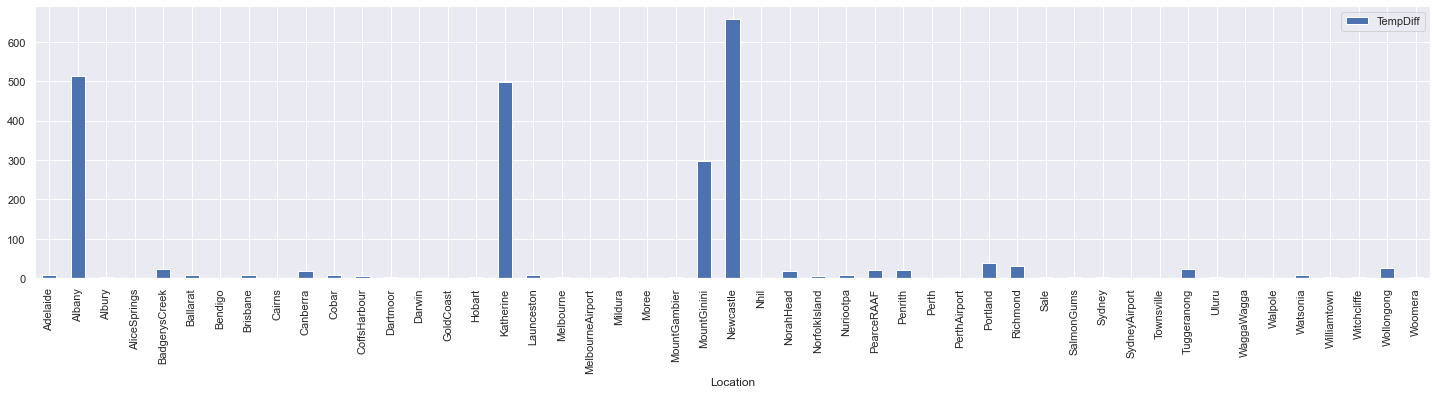

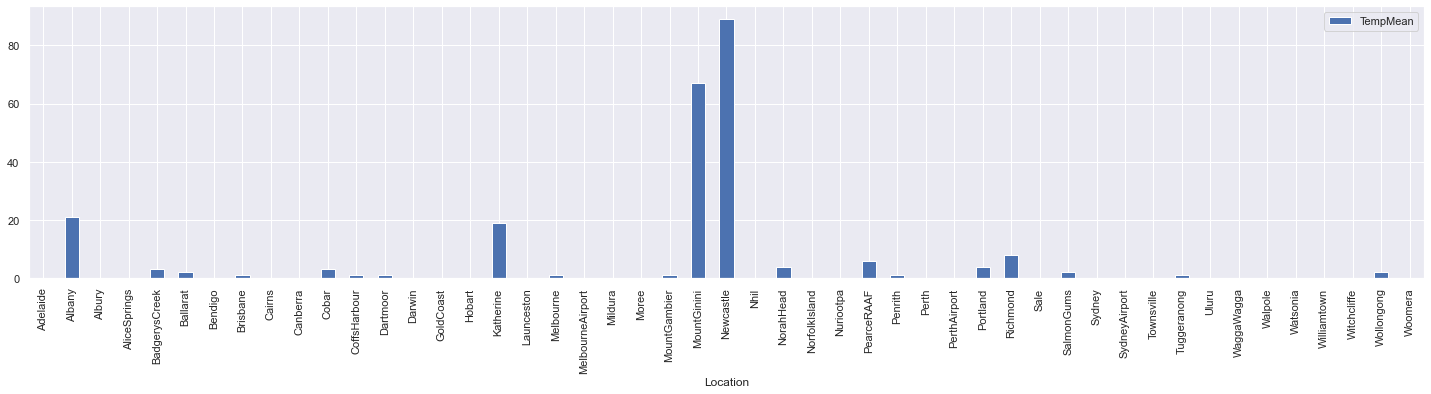

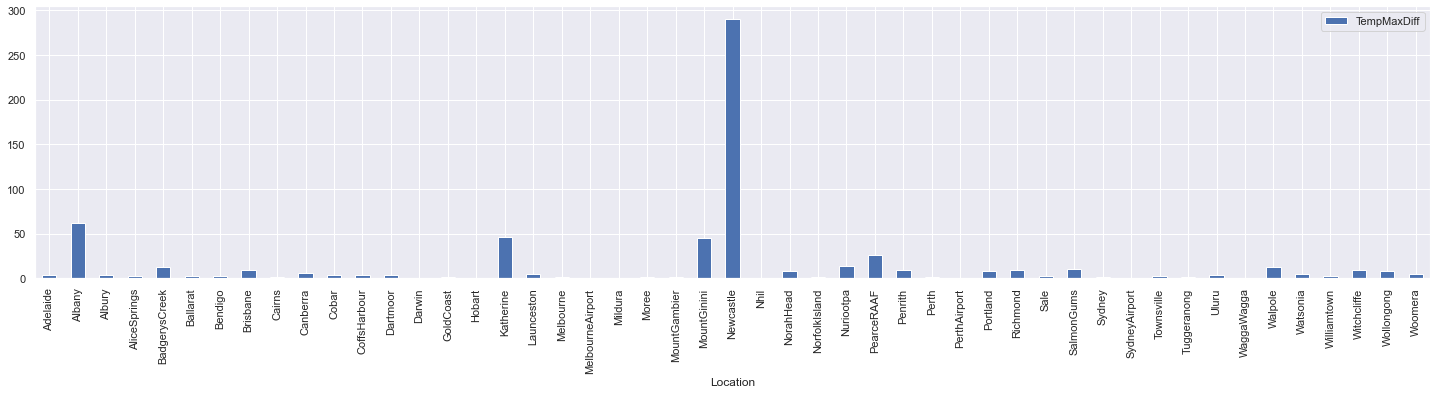

In [33]:
pd.set_option("display.max_columns", None)
%matplotlib inline

drop_df_nan = drop_columns+['RainTomorrow']+['RainfallTomorrow']+[col for col in X_train if col.startswith('LocationType_')]
df_nan_location = X_train.drop(drop_df_nan,axis=1).isnull().groupby(X_train['Location']).sum().astype(int)
df_nan_location.reset_index('Location',inplace=True)

for col in list(df_nan_location.drop(['Location'],axis=1).columns.values):
    df_nan_location.plot.bar(x='Location', y=col, rot=90, figsize=(25,5))
    
df_nan_location

In [34]:
drop_df_nan = drop_columns+['RainTomorrow']+[col for col in X_train if col.startswith('LocationType_')]
df_nan_clusters = X_train.drop(drop_df_nan,axis=1).groupby(X_train['LocationType']).sum().astype(int)
df_nan_clusters.reset_index('LocationType',inplace=True)
df_nan_clusters

,LocationType,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallTomorrow,RainfallYesterday,PressureMean,TempDiff,TempMean,TempMaxDiff
0,0,-659,230988,-2836,244619,249402,-4881,-3984,-224,1777,5621,-274,-474,1368,-2410,458,-1778
1,1,654,105001,684,97202,131854,1230,-162,-2142,-222,2825,678,742,675,-2202,1524,1596
2,2,-457,44769,-1002,55047,38805,-687,1906,157,1235,897,-411,-450,-1838,-2314,4973,-1113
3,3,1349,306105,2187,258291,306458,1552,982,7754,583,7208,869,1120,3366,7223,-14793,648
4,4,-1192,48441,529,51036,52374,1155,338,-5712,-5199,572,-1217,-1265,-3724,2379,7560,3471
5,5,305,15746,437,17129,18230,1630,920,168,1825,532,355,326,152,-2675,275,-2825


In [35]:
print(X_train['LocationType'].value_counts())

locationType_values = np.sort(X_train['LocationType'].unique())
locationType_count = [X_train[X_train['LocationType'] == l]['LocationType'].count() for l in locationType_values]
print('sorted: '+str(locationType_count))

3    37650
0    36677
1    15672
4     6706
2     6433
5     2148
Name: LocationType, dtype: int64
sorted: [36677, 15672, 6433, 37650, 6706, 2148]


,LocationType,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallYesterday,PressureMean,TempDiff,TempMean,TempMaxDiff
0,0,1.289637,10.314366,10.308913,9.488235,4.515091,2.145759,3.331788,1.845843,2.748316,1.289637,1.750416,18.472067,3.023693,0.468959,1.093328
1,1,0.989025,15.524502,15.416029,5.111026,4.383614,0.606177,3.713629,1.518632,4.587800,0.989025,1.576059,16.015824,3.471159,0.185043,0.772078
2,2,0.808332,0.637339,0.621794,11.953987,1.134774,0.357531,0.279807,0.544070,0.528525,0.808332,0.886056,0.077724,0.466345,0.124359,0.186538
3,3,0.589641,0.972112,0.940239,6.154050,0.804781,0.138114,0.151394,0.698539,0.579017,0.589641,0.887118,2.475432,0.270916,0.023904,0.148738
4,4,0.417537,1.431554,1.371906,3.981509,0.536833,0.342976,0.357888,1.028929,8.648971,0.417537,0.432449,0.014912,7.470922,0.283328,0.760513
5,5,0.651769,1.489758,1.443203,0.977654,0.139665,0.232775,0.093110,0.186220,0.093110,0.651769,1.163873,0.000000,0.279330,0.000000,0.046555


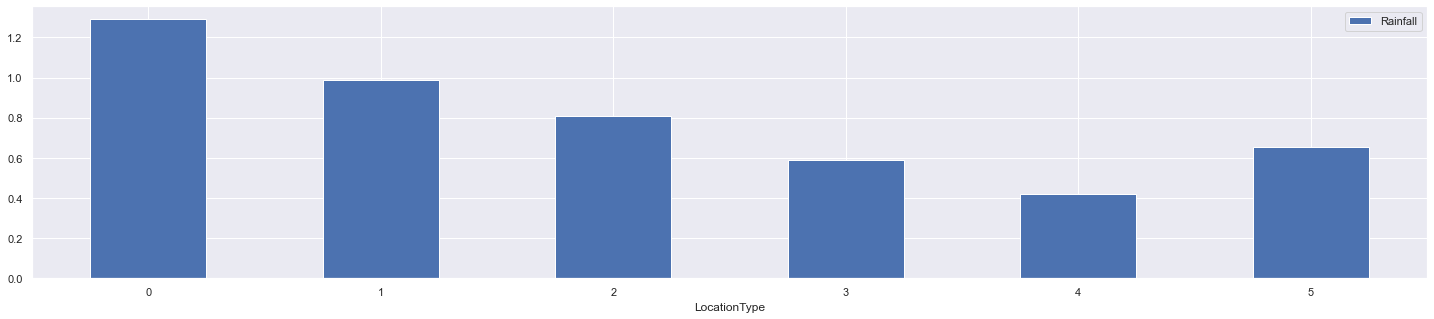

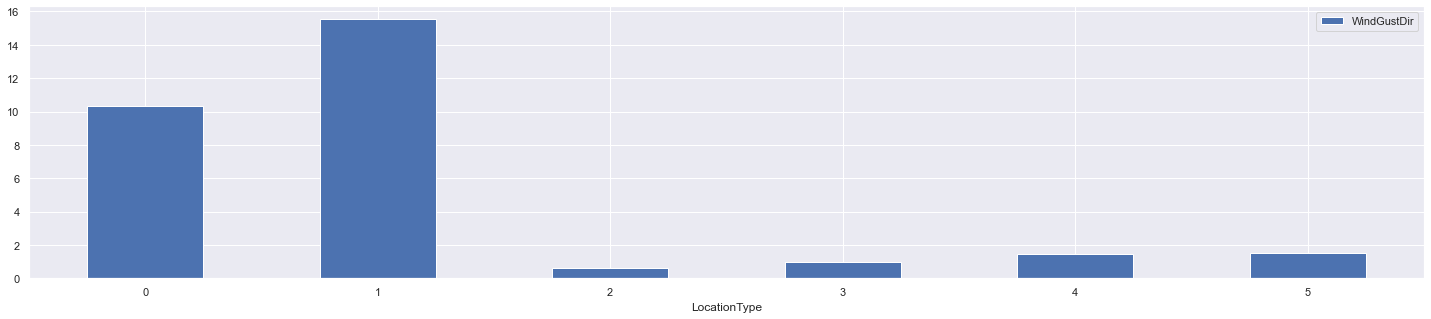

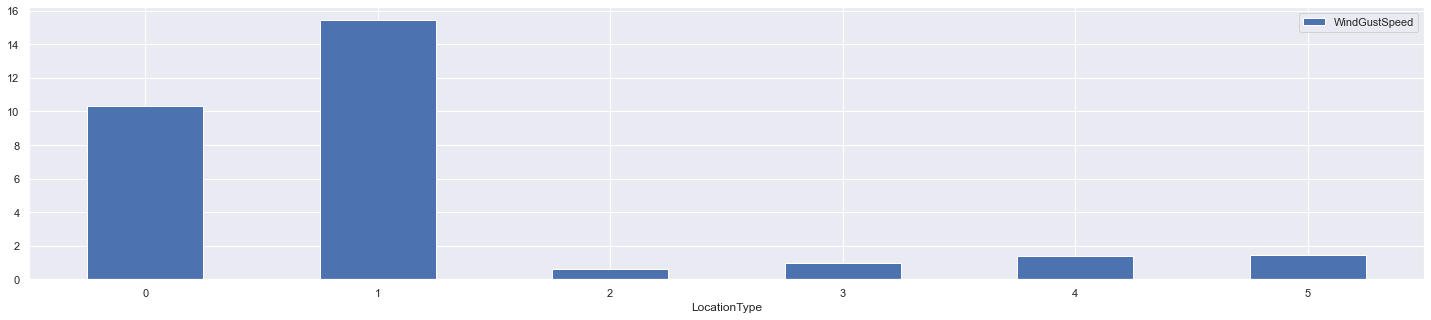

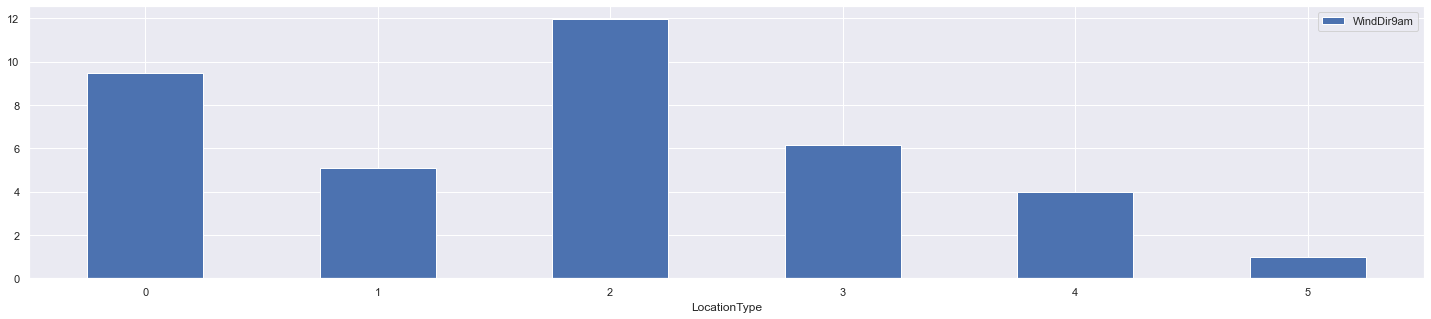

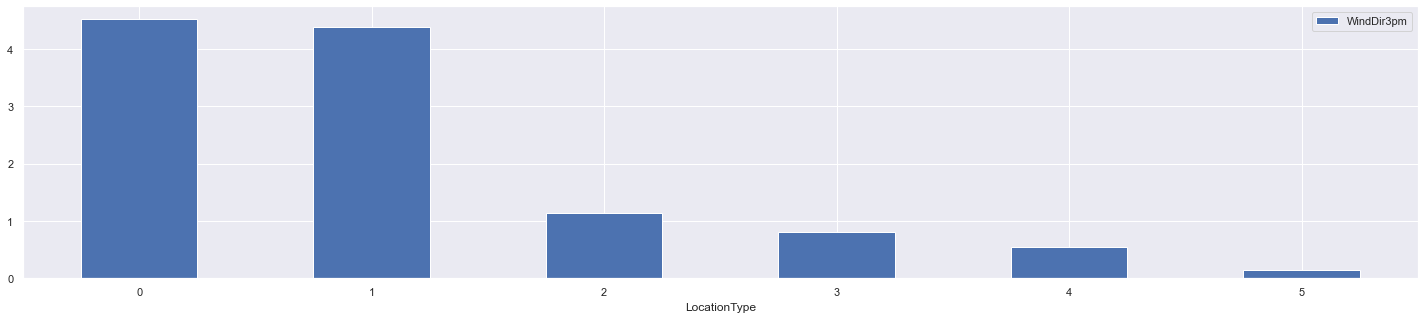

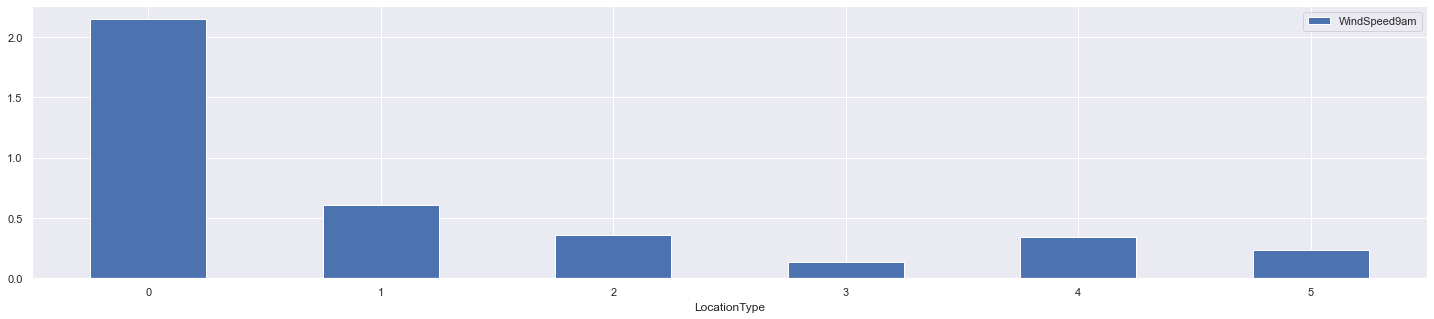

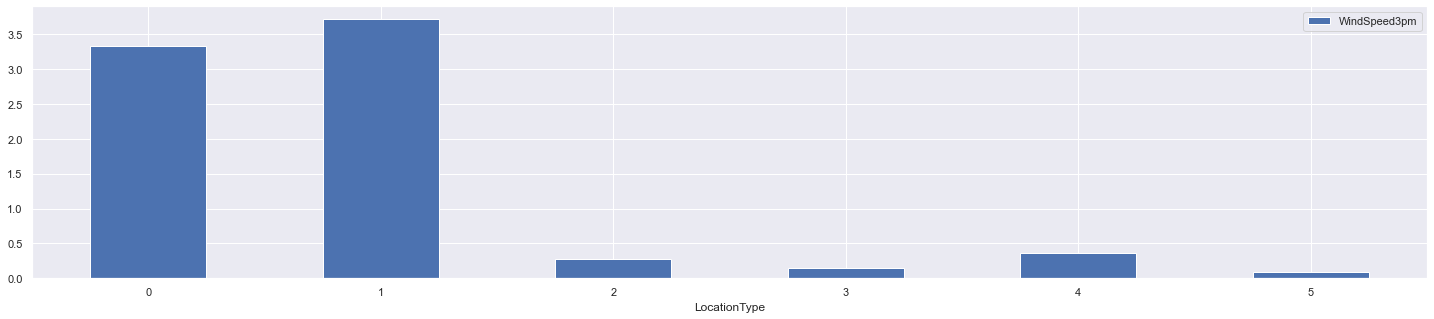

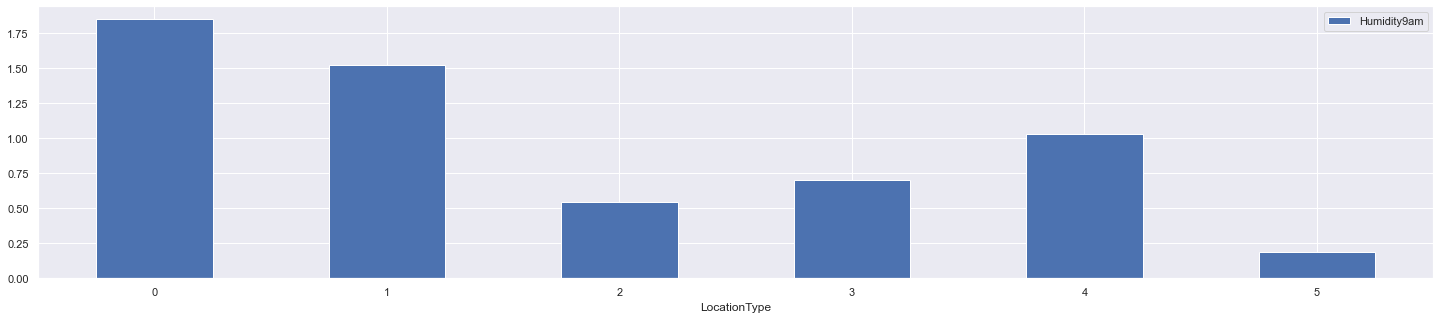

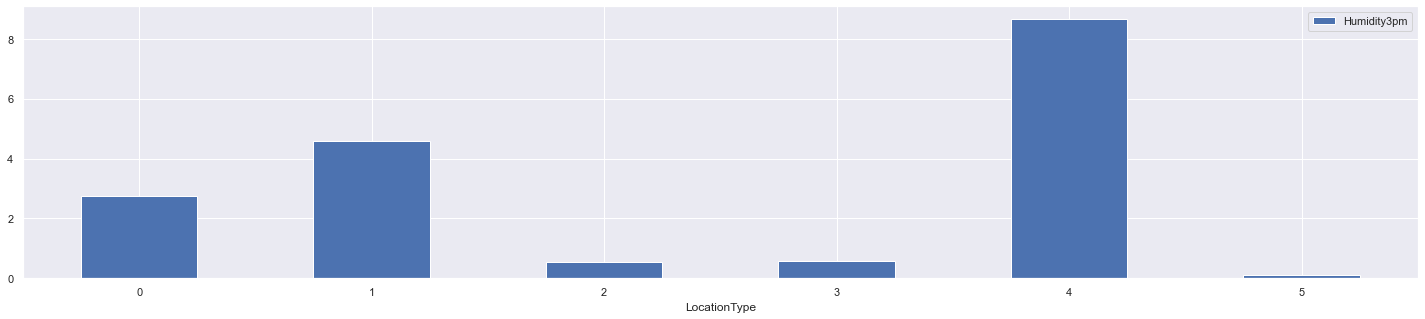

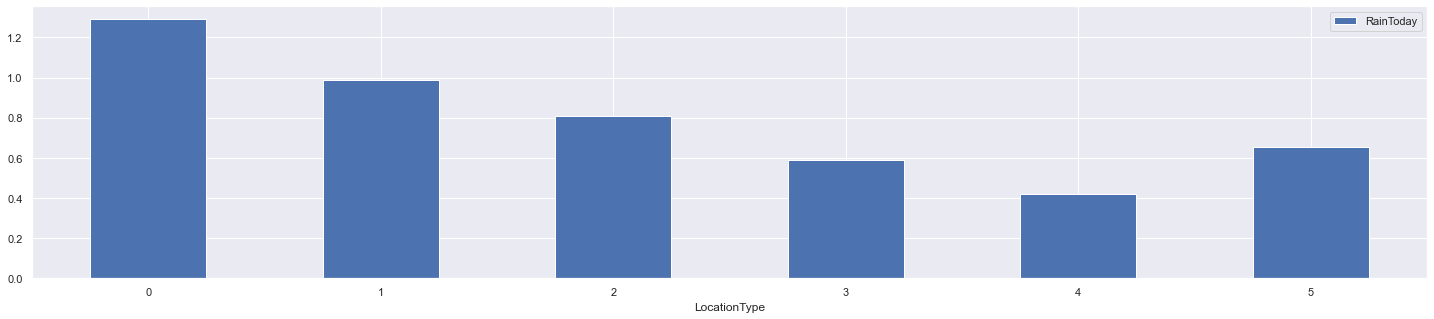

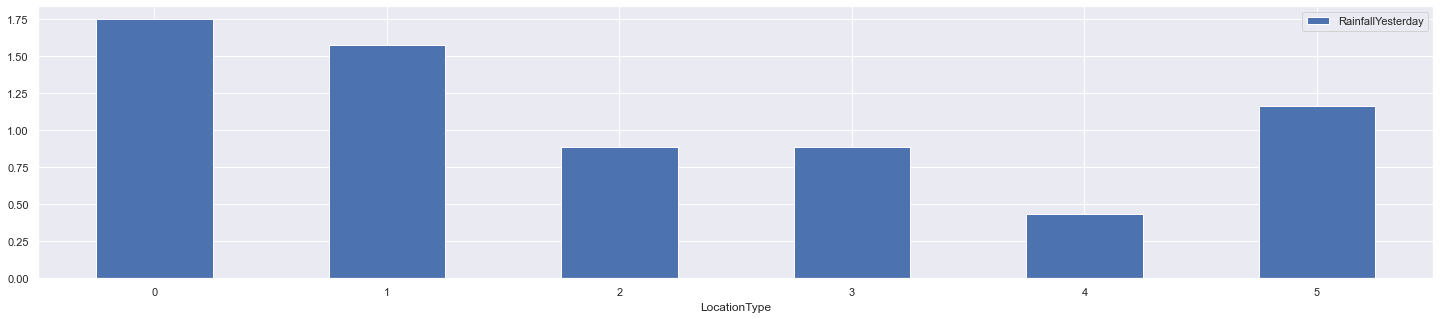

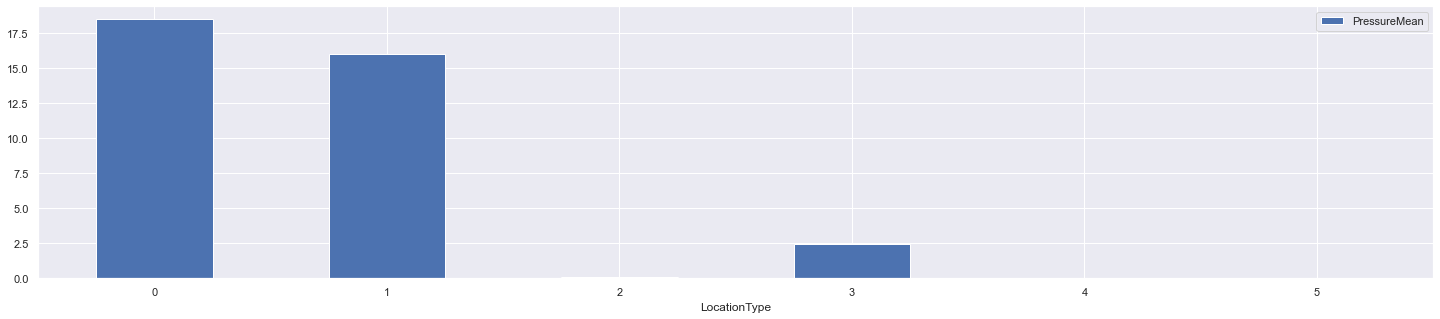

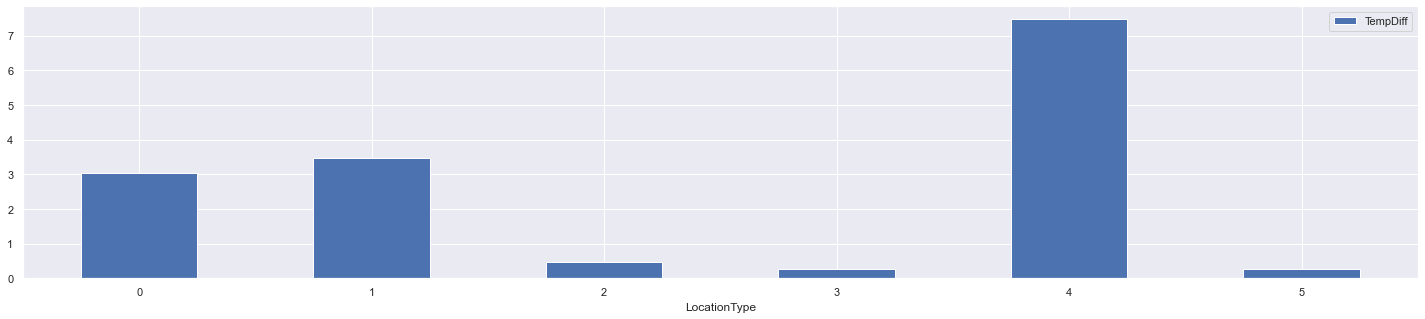

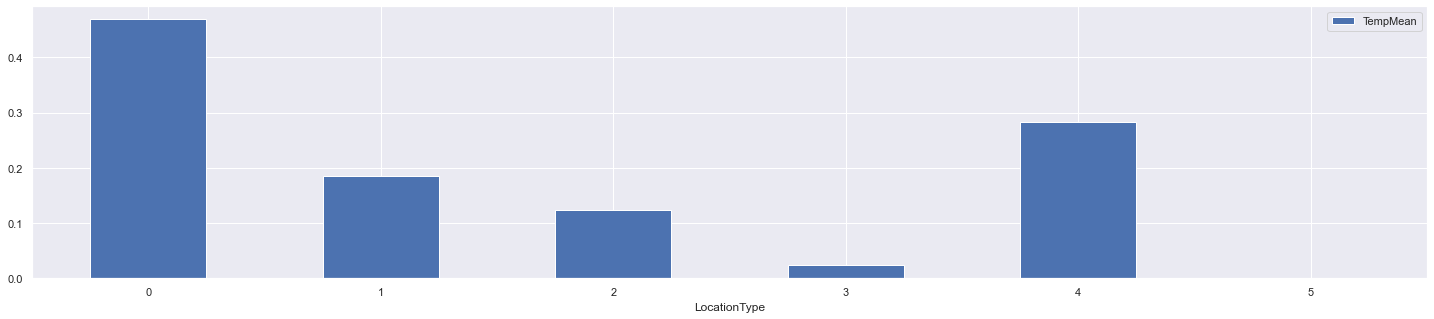

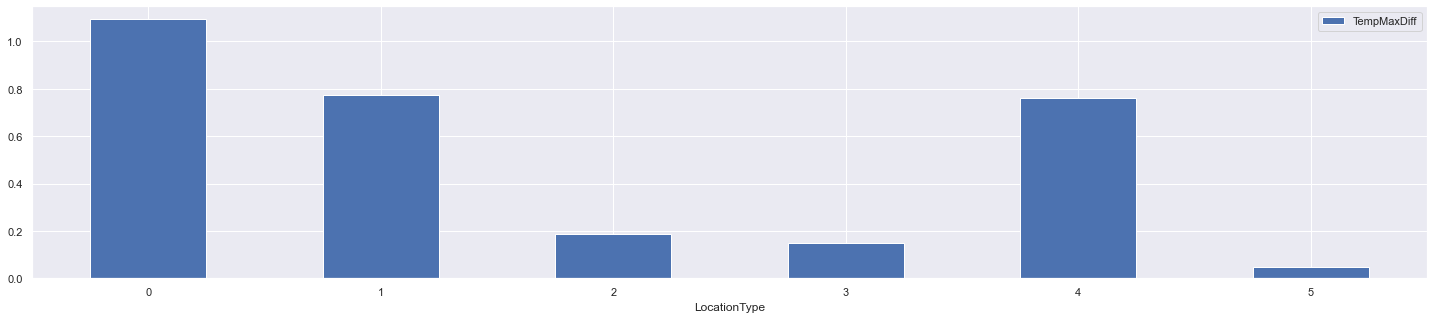

In [36]:
pd.set_option("display.max_columns", None)
%matplotlib inline

drop_df_nan = drop_columns+['RainTomorrow']+['RainfallTomorrow']+[col for col in X_train if col.startswith('LocationType_')]
df_nan_clusters = X_train.drop(drop_df_nan,axis=1).isnull().groupby(X_train['LocationType']).sum().astype(int)
df_nan_clusters.reset_index('LocationType',inplace=True)

#Convert to %
for val,count in zip(locationType_values,locationType_count):
    df_nan_clusters[df_nan_clusters['LocationType']==val]=df_nan_clusters[df_nan_clusters['LocationType']==val].mul(100/count)
df_nan_clusters['LocationType']=locationType_values

for col in list(df_nan_clusters.drop(['LocationType'],axis=1).columns.values):
    df_nan_clusters.plot.bar(x='LocationType', y=col, rot=0, figsize=(25,5))

df_nan_clusters

In [37]:
# The column with %NaN <= 5% will be imputed with a simple imputer (using mean).
# The column with %NaN > 5% will be imputed using KNN algorithm.
print("Percentage of NaN for each column:\nColumns with %NaN <= 5%:\n")
print(((1-X_train.count()/X_train.count().max())*100)[((1-X_train.count()/X_train.count().max())*100)<5])
print("\nColumns with %NaN > 5%:\n")
print(((1-X_train.count()/X_train.count().max())*100)[((1-X_train.count()/X_train.count().max())*100)>5])


Percentage of NaN for each column:
Columns with %NaN <= 5%:

Location             0.000000
Rainfall             0.896605
WindDir3pm           2.619532
WindSpeed9am         0.935547
WindSpeed3pm         1.809357
Humidity9am          1.221435
Humidity3pm          2.432422
RainToday            0.896605
RainfallTomorrow     0.000000
RainfallYesterday    1.267025
RainTomorrow         0.000000
LocationType         0.000000
LocationType_0       0.000000
LocationType_1       0.000000
LocationType_2       0.000000
LocationType_3       0.000000
LocationType_4       0.000000
TempDiff             2.176928
TempMean             0.225101
TempMaxDiff          0.609768
dtype: float64

Columns with %NaN > 5%:

WindGustDir      6.412059
WindGustSpeed    6.376916
WindDir9am       7.270672
PressureMean     9.709743
dtype: float64


## Simple mean imputation

In [38]:
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper

# Consider discrete variables: WindDir3pm -> must be integer
# RainToday -> will be imputed by KNN
imputed_by_mean_col = [
    'Rainfall',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'RainfallYesterday',
    'RainfallTomorrow',
    'TempDiff',
    'TempMean',
    'TempMaxDiff',
    'WindDir3pm'
]

In [39]:
X_train_imputed = X_train.copy()
X_train_imputed['imputed_mean'] = 0

imputer = SimpleImputer(strategy='mean',add_indicator=True)

for k in np.sort(pd.unique(X_train['LocationType'])):
    
    print("Running for cluster: "+str(k))

    indx=X_train.loc[X_train['LocationType'] == k][imputed_by_mean_col].copy().index # Get index
    mapper = DataFrameMapper([(imputed_by_mean_col, imputer)])
    
    # X_train.loc[X_train['LocationType'] == k][imputed_by_mean_col]
    transform_features = mapper.fit_transform(X_train.loc[X_train['LocationType'] == k][imputed_by_mean_col].copy(), 4) # Round 4 digits
    qty_imputed_cols = np.array(transform_features).shape[1]-len(imputed_by_mean_col) # Number of imputed columns
    imputed_by_mean_imp_col = [str(d) + "_imputed" for d in range(qty_imputed_cols)] # Name of indicators of imputation
    transform_features_df = pd.DataFrame(transform_features, index=indx, columns=imputed_by_mean_col+imputed_by_mean_imp_col)

    # Add column of imputed indicator. Only one column as an "or" logical operation of all indicators.
    transform_features_df['imputed_mean'] = (transform_features_df[imputed_by_mean_imp_col].sum(axis=1)>0).astype(int)

    X_train_imputed.loc[indx,imputed_by_mean_col+['imputed_mean']]=transform_features_df[imputed_by_mean_col+['imputed_mean']] # Replace in original dataset

    # Check data
    assert(not np.any(X_train_imputed[X_train_imputed.LocationType==k][imputed_by_mean_col].isna().sum()>0))

# Round discrete columns    
X_train_imputed.WindDir3pm = X_train_imputed.WindDir3pm.round()

X_train_imputed.head()

Running for cluster: 0
Running for cluster: 1
Running for cluster: 2
Running for cluster: 3
Running for cluster: 4
Running for cluster: 5


,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallTomorrow,RainfallYesterday,RainTomorrow,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff,imputed_mean
910,Albury,-0.399011,1.0,-1.801820,NaN,15.0,-1.638667,-1.487269,0.702493,0.022419,0.0,-0.401196,-0.410322,0,3,0.0,0.0,0.0,1.0,0.0,2.747470,1.571633,-1.316965,0.876093,0
125054,SalmonGums,-0.304513,10.0,-0.127871,8.0,9.0,0.440678,0.112725,1.130916,1.434825,0.0,-0.122240,-0.318982,0,1,0.0,1.0,0.0,0.0,0.0,NaN,-0.272716,-1.146049,-0.322330,0
14892,Moree,-0.304513,13.0,1.127590,1.0,1.0,0.807622,-0.379581,-0.207906,-0.683783,0.0,-0.122240,0.046381,0,0,1.0,0.0,0.0,0.0,0.0,-0.322980,0.303643,1.200166,0.524831,0
106576,Woomera,-0.399011,14.0,-0.713753,14.0,9.0,0.685307,-0.625734,-1.760939,-1.692644,0.0,-0.401196,-0.410322,0,3,0.0,0.0,0.0,1.0,0.0,0.551090,0.591822,0.842796,1.062055,0
83779,Dartmoor,-0.399011,13.0,-0.881148,14.0,13.0,-0.048579,-0.625734,-0.315012,0.526850,0.0,-0.401196,-0.410322,0,3,0.0,0.0,0.0,1.0,0.0,-0.599395,-0.676167,-0.710989,0.235556,0


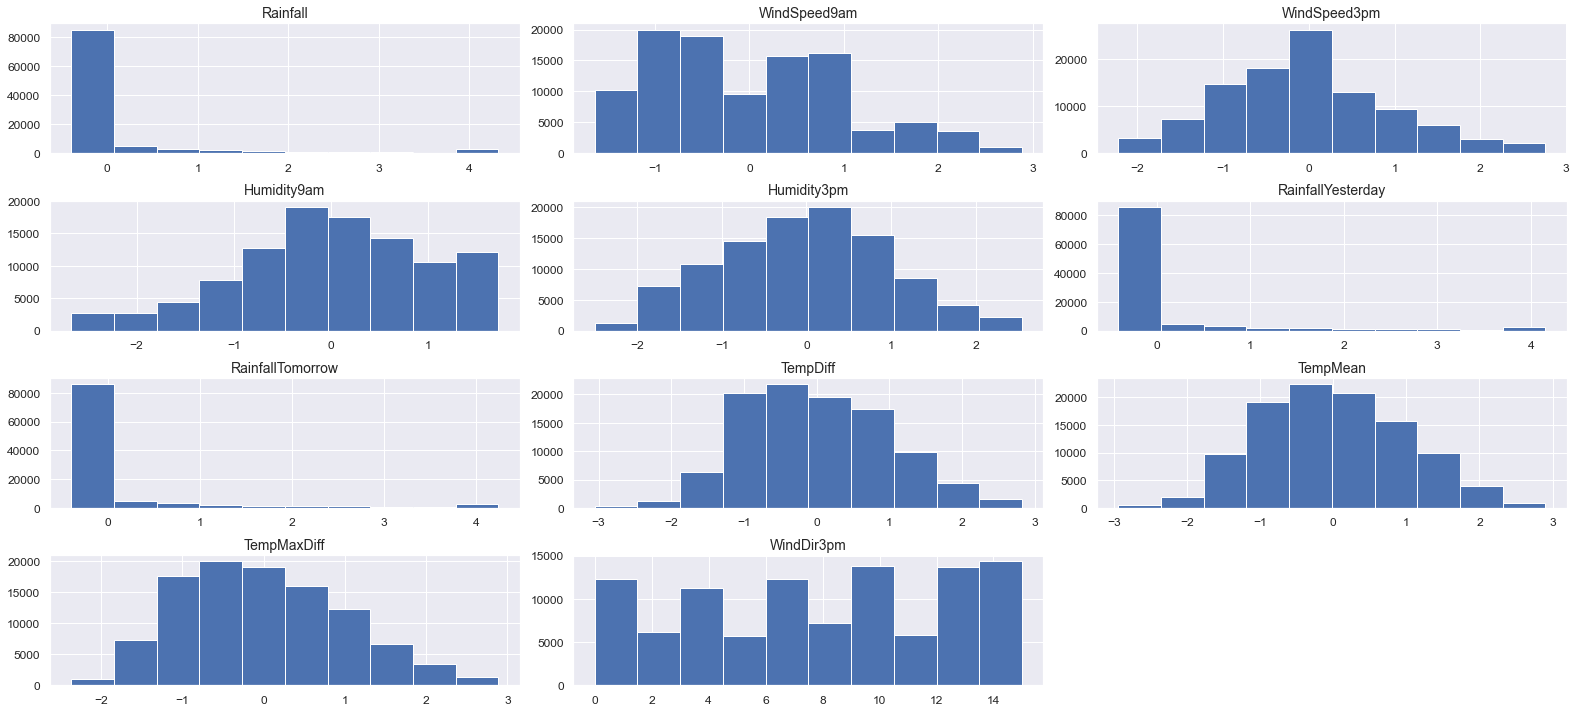

In [40]:
display_dataset_distributions(X_train[imputed_by_mean_col])

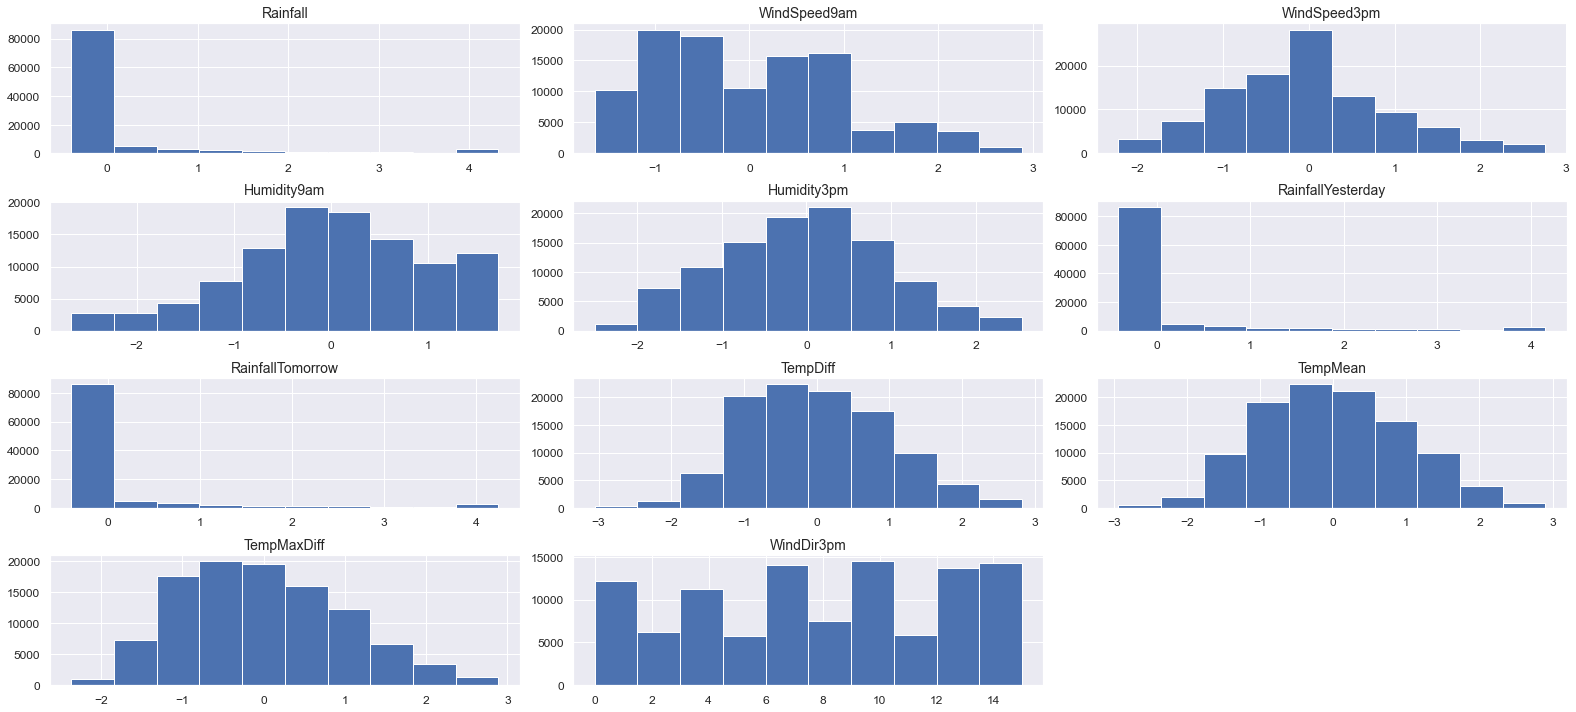

In [41]:
display_dataset_distributions(X_train_imputed[imputed_by_mean_col])

## KNN imputation

In [42]:
# Consider discrete variables: RainToday, WindDir9am, WindGustDir -> must be integer
imputed_by_knn_col = [
    'RainToday',
    'WindGustDir',
    'WindGustSpeed',
    'WindDir9am',
    'PressureMean'
]
neighbors_col =[
    'Rainfall',
    'WindDir3pm',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'TempDiff',
    'TempMean',
    'TempMaxDiff'
]

In [43]:
X_train_imputed_knn = X_train_imputed.copy()

from sklearn.impute import KNNImputer
X_train_imputed_knn['imputed_knn'] = 0
neighbors = 5
imputer = KNNImputer(n_neighbors=neighbors,add_indicator=True)

knn_cols = imputed_by_knn_col + neighbors_col

for k in np.sort(pd.unique(X_train['LocationType'])):
    print("Running for cluster: "+str(k))

    indx=X_train.loc[X_train['LocationType'] == k][knn_cols].copy().index # Get index
    mapper = DataFrameMapper([(knn_cols, imputer)])

    # X_train.loc[X_train['LocationType'] == k][knn_cols+['LocationType']]
    transform_features = mapper.fit_transform(X_train.loc[X_train['LocationType'] == k][knn_cols].copy(), 4) # Round 4 digits
    qty_imputed_cols = np.array(transform_features).shape[1]-len(knn_cols) # Number of imputed columns
    imputed_by_knn_imp_col = [str(d) + "_imputed" for d in range(qty_imputed_cols)] # Name of indicators of imputation
    transform_features_df = pd.DataFrame(transform_features, index=indx, columns=knn_cols+imputed_by_knn_imp_col)
    transform_features_df.isna().sum()

    # Add column of imputed indicator. Only one column as an "or" logical operation of all indicators.
    transform_features_df['imputed_knn'] = (transform_features_df[imputed_by_knn_imp_col].sum(axis=1)>0).astype(int)

    X_train_imputed_knn.loc[indx,imputed_by_knn_col+['imputed_knn']]=transform_features_df[imputed_by_knn_col+['imputed_knn']] # Replace in original dataset

    # Check data
    assert(not np.any(X_train_imputed_knn[X_train_imputed_knn.LocationType==k][imputed_by_knn_col].isna().sum()>0))

# Round discrete columns   
X_train_imputed_knn.RainToday = X_train_imputed_knn.RainToday.round()
X_train_imputed_knn.WindDir9am = X_train_imputed_knn.WindDir9am.round()
X_train_imputed_knn.WindGustDir = X_train_imputed_knn.WindGustDir.round()
X_train_imputed_knn.head()


Running for cluster: 0
Running for cluster: 1
Running for cluster: 2
Running for cluster: 3
Running for cluster: 4
Running for cluster: 5


,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallTomorrow,RainfallYesterday,RainTomorrow,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff,imputed_mean,imputed_knn
910,Albury,-0.399011,1.0,-1.801820,1.0,15.0,-1.638667,-1.487269,0.702493,0.022419,0.0,-0.401196,-0.410322,0,3,0.0,0.0,0.0,1.0,0.0,2.747470,1.571633,-1.316965,0.876093,0,1
125054,SalmonGums,-0.304513,10.0,-0.127871,8.0,9.0,0.440678,0.112725,1.130916,1.434825,0.0,-0.122240,-0.318982,0,1,0.0,1.0,0.0,0.0,0.0,0.252263,-0.272716,-1.146049,-0.322330,0,1
14892,Moree,-0.304513,13.0,1.127590,1.0,1.0,0.807622,-0.379581,-0.207906,-0.683783,0.0,-0.122240,0.046381,0,0,1.0,0.0,0.0,0.0,0.0,-0.322980,0.303643,1.200166,0.524831,0,0
106576,Woomera,-0.399011,14.0,-0.713753,14.0,9.0,0.685307,-0.625734,-1.760939,-1.692644,0.0,-0.401196,-0.410322,0,3,0.0,0.0,0.0,1.0,0.0,0.551090,0.591822,0.842796,1.062055,0,0
83779,Dartmoor,-0.399011,13.0,-0.881148,14.0,13.0,-0.048579,-0.625734,-0.315012,0.526850,0.0,-0.401196,-0.410322,0,3,0.0,0.0,0.0,1.0,0.0,-0.599395,-0.676167,-0.710989,0.235556,0,0


In [44]:
print("Percentage of NaN for each imputed column:\n")
print(((1-X_train_imputed_knn.count()/X_train_imputed_knn.count().max())*100))

Percentage of NaN for each imputed column:

Location             0.0
Rainfall             0.0
WindGustDir          0.0
WindGustSpeed        0.0
WindDir9am           0.0
WindDir3pm           0.0
WindSpeed9am         0.0
WindSpeed3pm         0.0
Humidity9am          0.0
Humidity3pm          0.0
RainToday            0.0
RainfallTomorrow     0.0
RainfallYesterday    0.0
RainTomorrow         0.0
LocationType         0.0
LocationType_0       0.0
LocationType_1       0.0
LocationType_2       0.0
LocationType_3       0.0
LocationType_4       0.0
PressureMean         0.0
TempDiff             0.0
TempMean             0.0
TempMaxDiff          0.0
imputed_mean         0.0
imputed_knn          0.0
dtype: float64


In [45]:
X_train = X_train_imputed_knn

# Cyclic encoding for wind speed

In [46]:
wind_dir_colums = ['WindGustDir','WindDir9am','WindDir3pm']
for wd in wind_dir_colums:
    X_train[wd+'_cos'] = np.cos(2 * np.pi * (X_train[wd]/16))
    X_train[wd+'_sin'] = np.sin(2 * np.pi * (X_train[wd]/16))

# X_train.drop(wind_dir_colums,axis=1, inplace=True)
drop_columns+=wind_dir_colums
X_train.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallTomorrow,RainfallYesterday,RainTomorrow,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff,imputed_mean,imputed_knn,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
910,Albury,-0.399011,1.0,-1.801820,1.0,15.0,-1.638667,-1.487269,0.702493,0.022419,0.0,-0.401196,-0.410322,0,3,0.0,0.0,0.0,1.0,0.0,2.747470,1.571633,-1.316965,0.876093,0,1,0.923880,0.382683,0.923880,3.826834e-01,0.923880,-0.382683
125054,SalmonGums,-0.304513,10.0,-0.127871,8.0,9.0,0.440678,0.112725,1.130916,1.434825,0.0,-0.122240,-0.318982,0,1,0.0,1.0,0.0,0.0,0.0,0.252263,-0.272716,-1.146049,-0.322330,0,1,-0.707107,-0.707107,-1.000000,1.224647e-16,-0.923880,-0.382683
14892,Moree,-0.304513,13.0,1.127590,1.0,1.0,0.807622,-0.379581,-0.207906,-0.683783,0.0,-0.122240,0.046381,0,0,1.0,0.0,0.0,0.0,0.0,-0.322980,0.303643,1.200166,0.524831,0,0,0.382683,-0.923880,0.923880,3.826834e-01,0.923880,0.382683
106576,Woomera,-0.399011,14.0,-0.713753,14.0,9.0,0.685307,-0.625734,-1.760939,-1.692644,0.0,-0.401196,-0.410322,0,3,0.0,0.0,0.0,1.0,0.0,0.551090,0.591822,0.842796,1.062055,0,0,0.707107,-0.707107,0.707107,-7.071068e-01,-0.923880,-0.382683
83779,Dartmoor,-0.399011,13.0,-0.881148,14.0,13.0,-0.048579,-0.625734,-0.315012,0.526850,0.0,-0.401196,-0.410322,0,3,0.0,0.0,0.0,1.0,0.0,-0.599395,-0.676167,-0.710989,0.235556,0,0,0.382683,-0.923880,0.707107,-7.071068e-01,0.382683,-0.923880


# Normalization

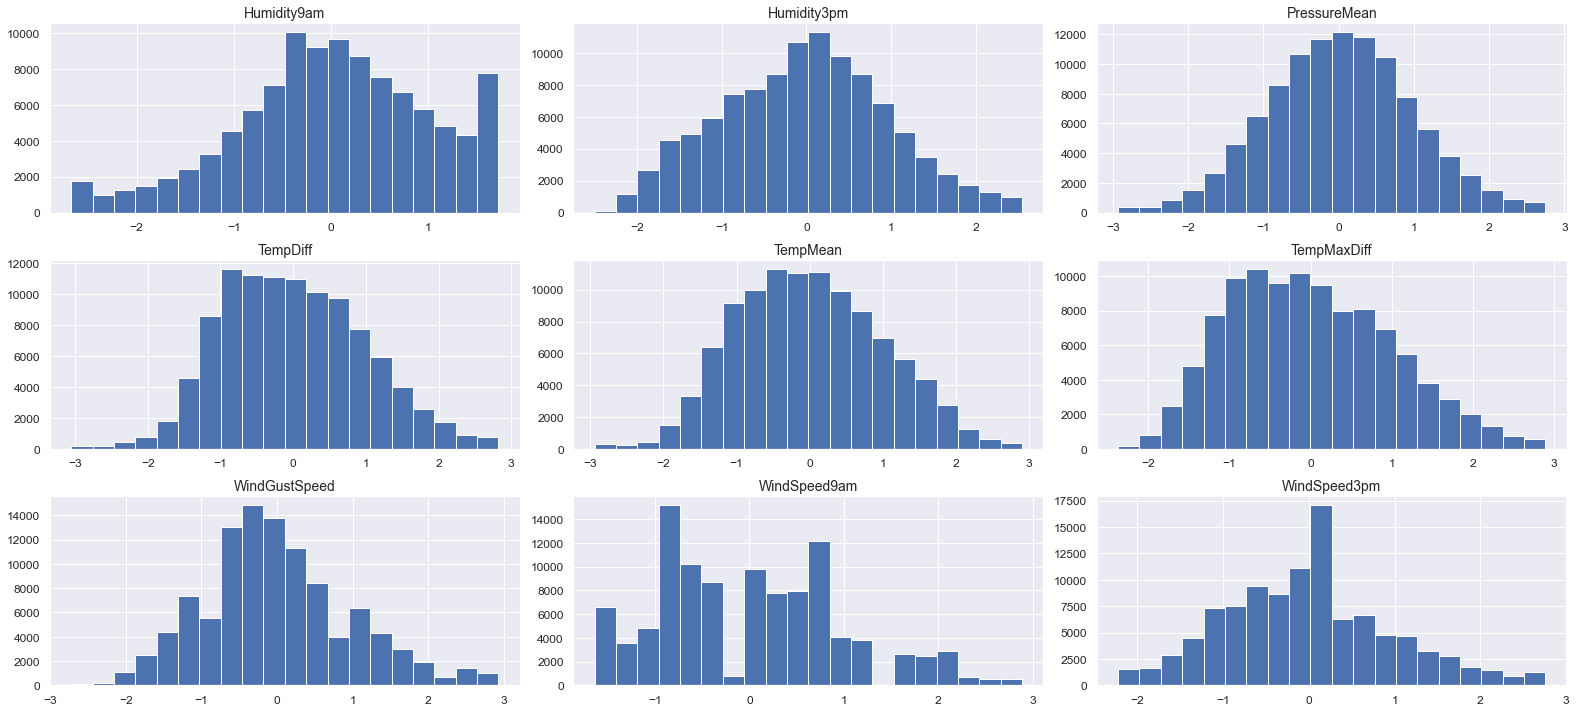

In [47]:
norm_col_yj = [
    'Humidity9am',
    'Humidity3pm',
    'PressureMean',
    'TempDiff',
    'TempMean',
    'TempMaxDiff'
]

norm_col_qt = [
    'WindGustSpeed',
    'WindSpeed9am',
    'WindSpeed3pm',
]

display_dataset_distributions(X_train[norm_col_yj+norm_col_qt],bins=20)

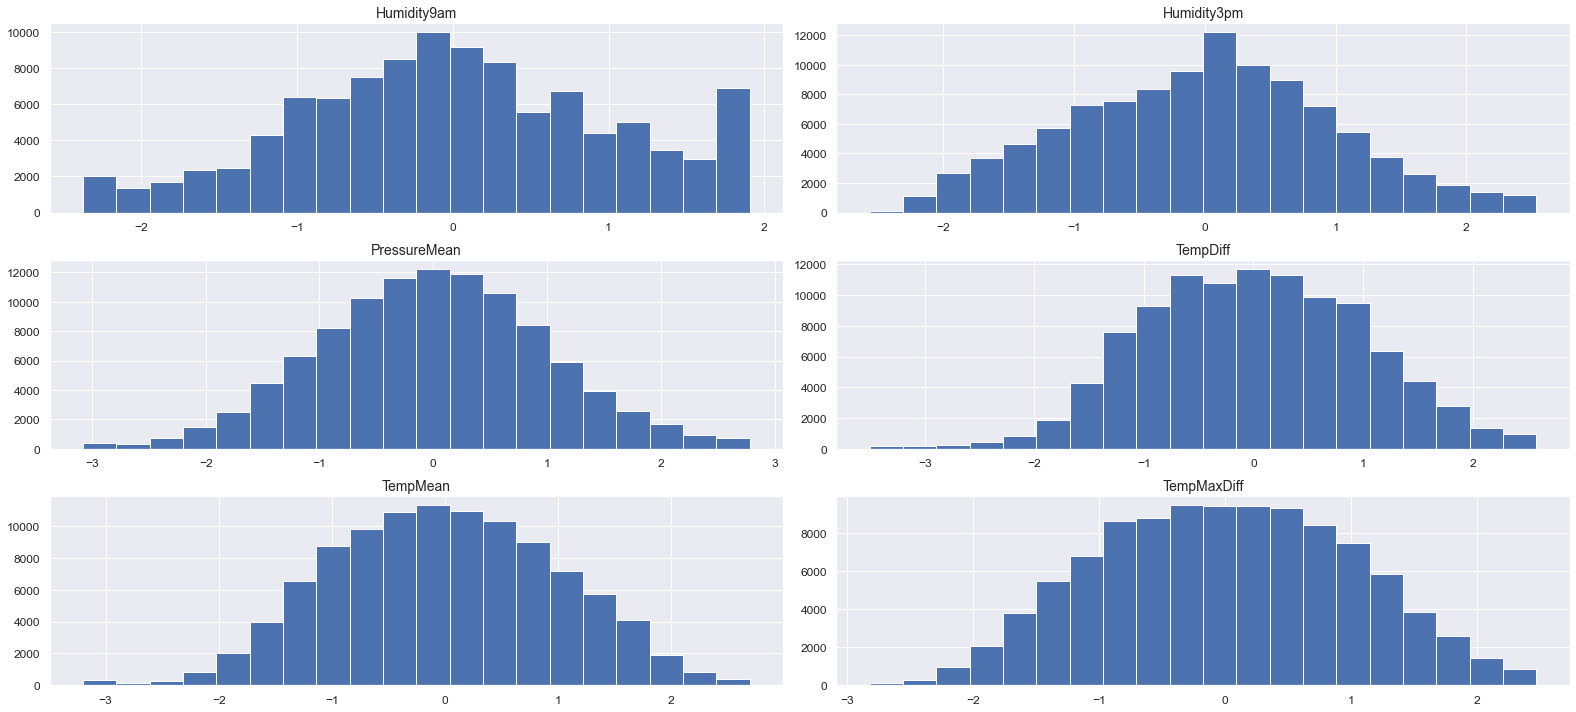

In [48]:
from sklearn.preprocessing import PowerTransformer

X_transformed = X_train.copy()
power = PowerTransformer(method= 'yeo-johnson')
X_transformed[norm_col_yj] = power.fit_transform(X_train[norm_col_yj])
display_dataset_distributions(X_transformed[norm_col_yj],bins=20)

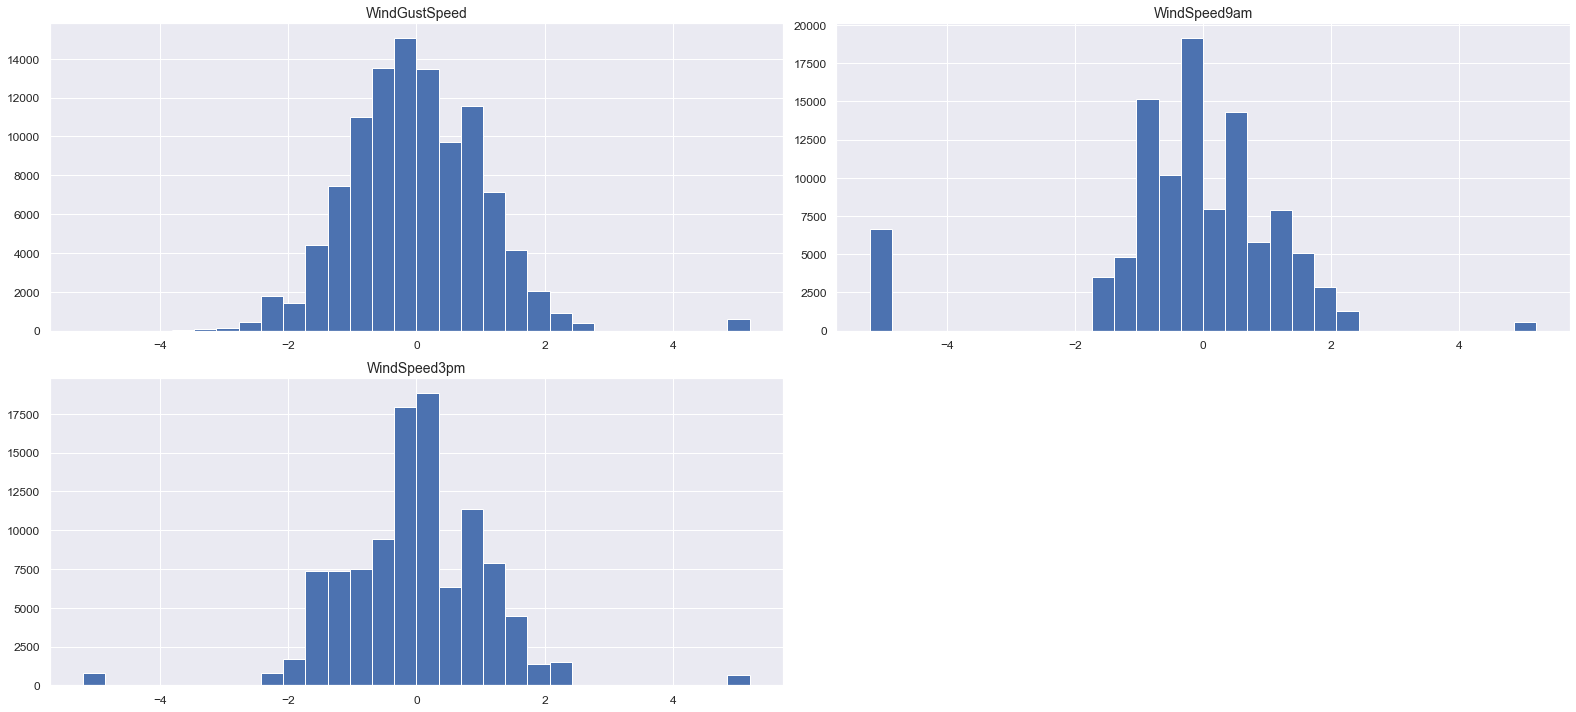

In [49]:
from sklearn.preprocessing import QuantileTransformer

power = QuantileTransformer(output_distribution= 'normal')
X_transformed[norm_col_qt] = power.fit_transform(X_train[norm_col_qt])
display_dataset_distributions(X_transformed[norm_col_qt],bins=30)

# Correlation

In [50]:
drop_for_plot = ['LocationType_0','LocationType_1','LocationType_2','LocationType_3',
                'LocationType_4','LocationType','imputed_mean', 'imputed_knn',
                'WindGustDir_cos', 'WindGustDir_sin', 'WindDir9am_cos',
                'WindDir9am_sin', 'WindDir3pm_cos', 'WindDir3pm_sin']

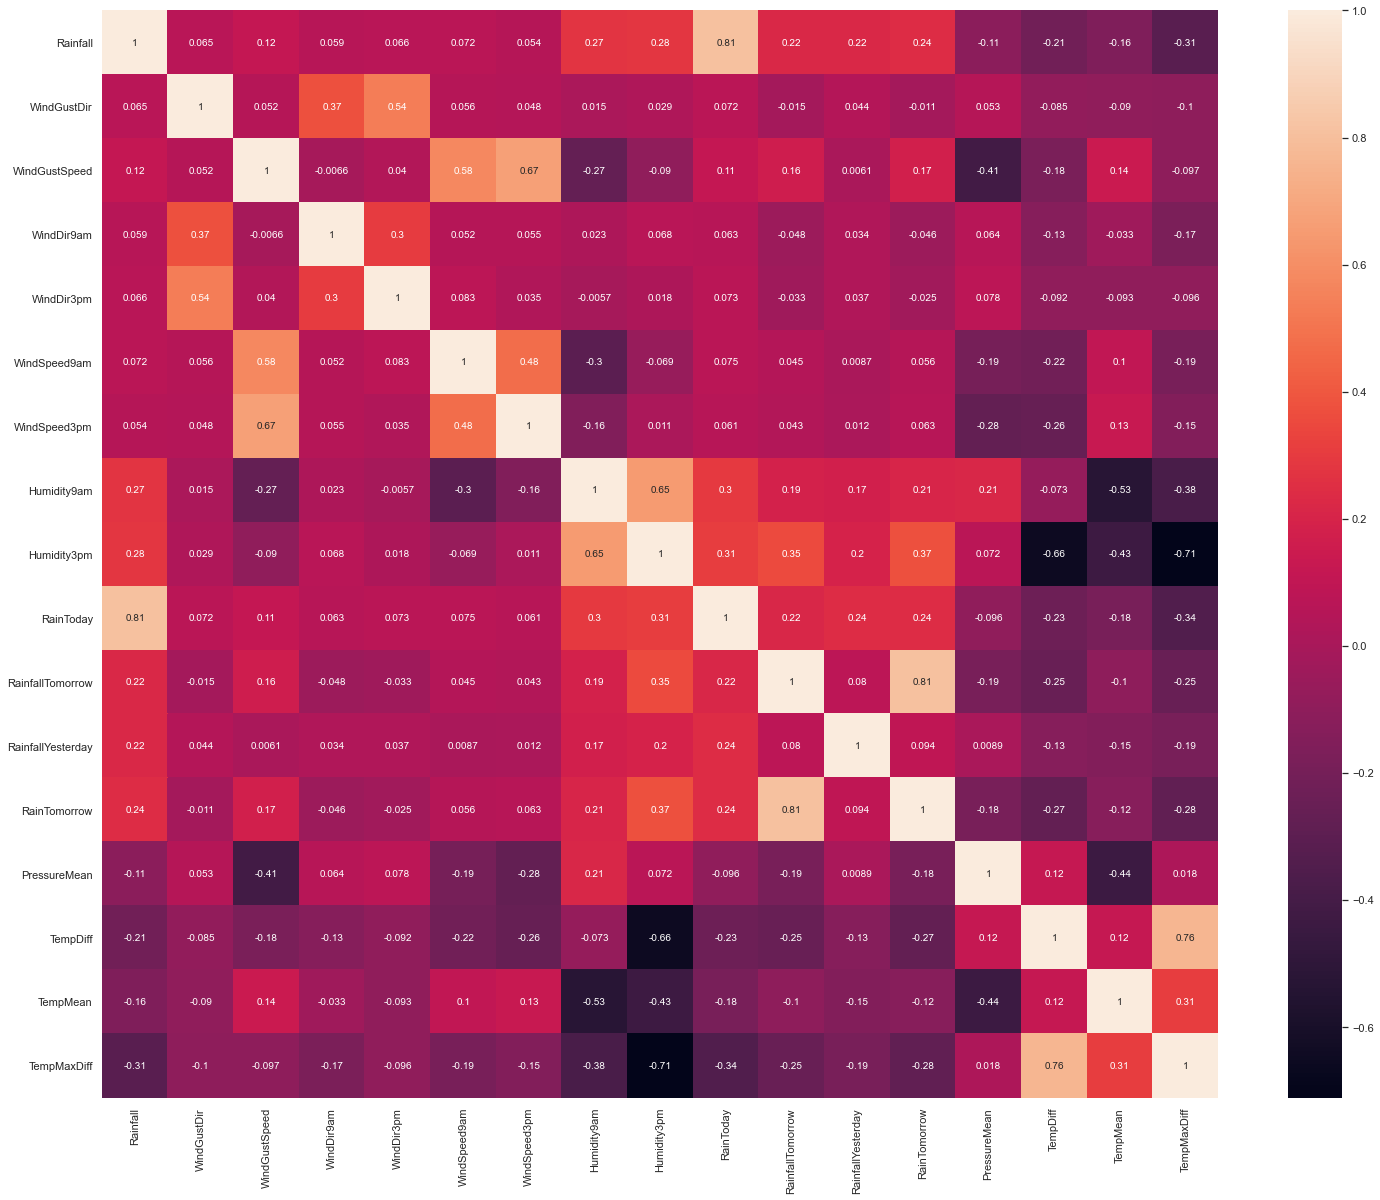

In [51]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(X_train.drop(drop_for_plot,axis=1).corr(), annot=True)

C:\Users\Baffo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


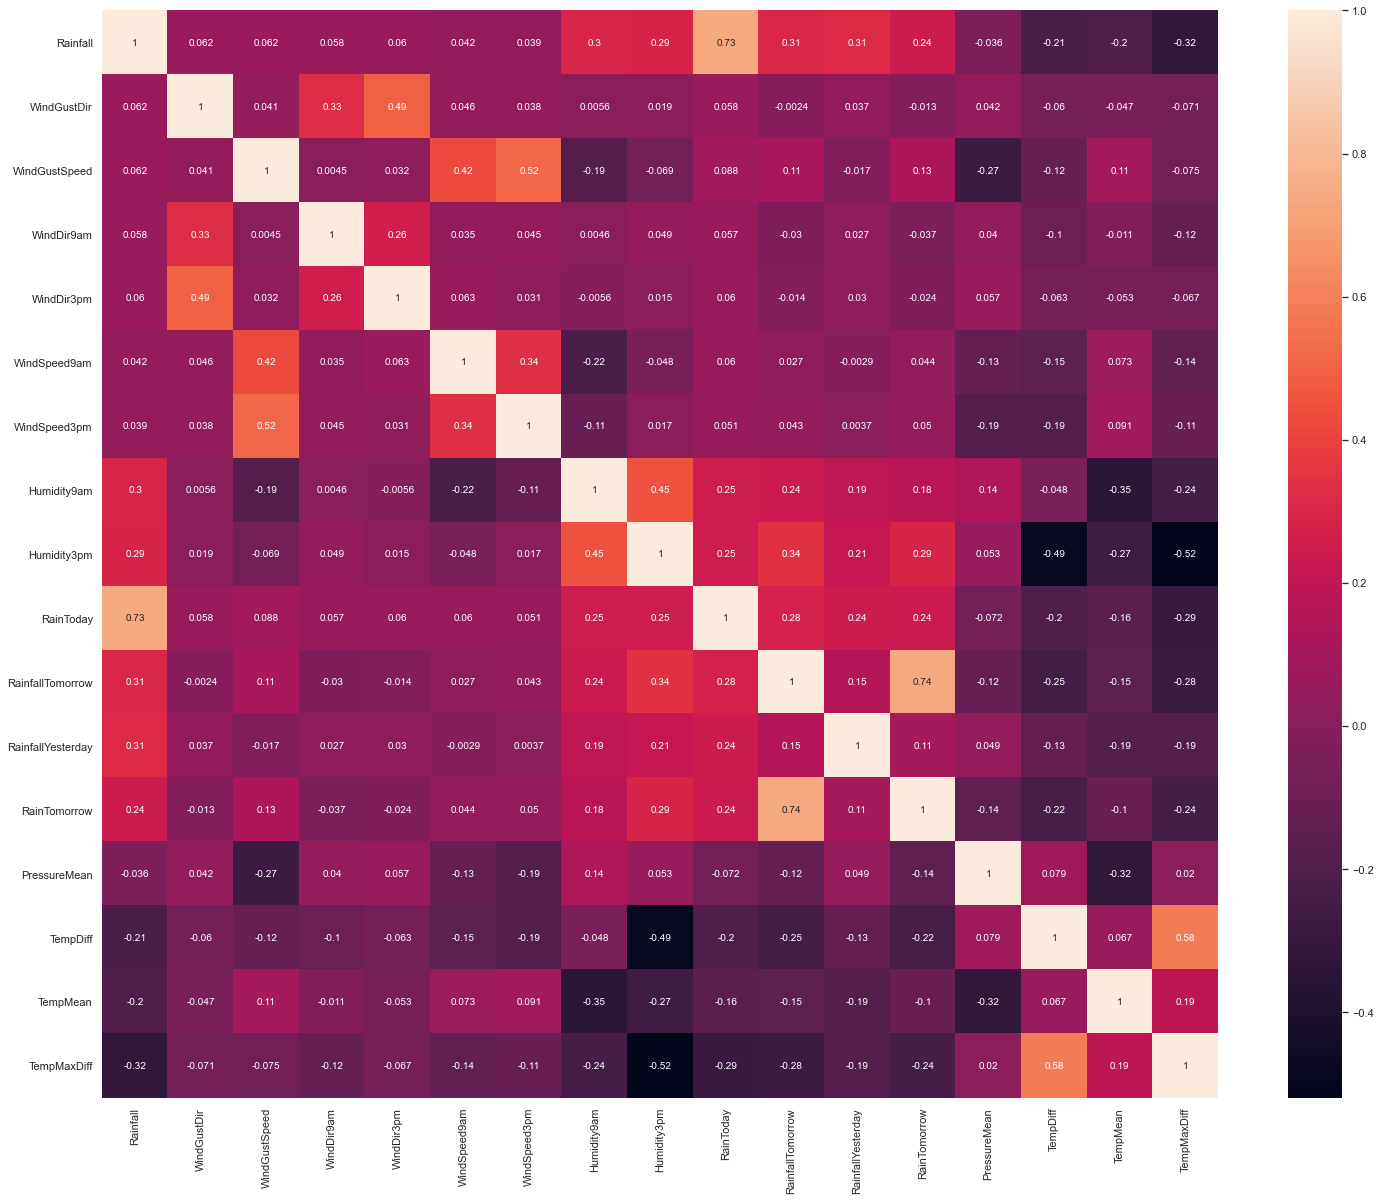

In [52]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(X_train.drop(drop_for_plot,axis=1).corr(method='kendall'),annot=True)

In [53]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

def select_features_mi(X_train, y_train, k='all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)  
  return X_train_fs, fs

def select_features_continouos(X, y):
  return mutual_info_regression(X, y, discrete_features='auto')


mi_cols = ['Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
  'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
  'Humidity3pm', 'RainToday', 'RainfallYesterday', 'PressureMean',
  'TempDiff', 'TempMean', 'TempMaxDiff']

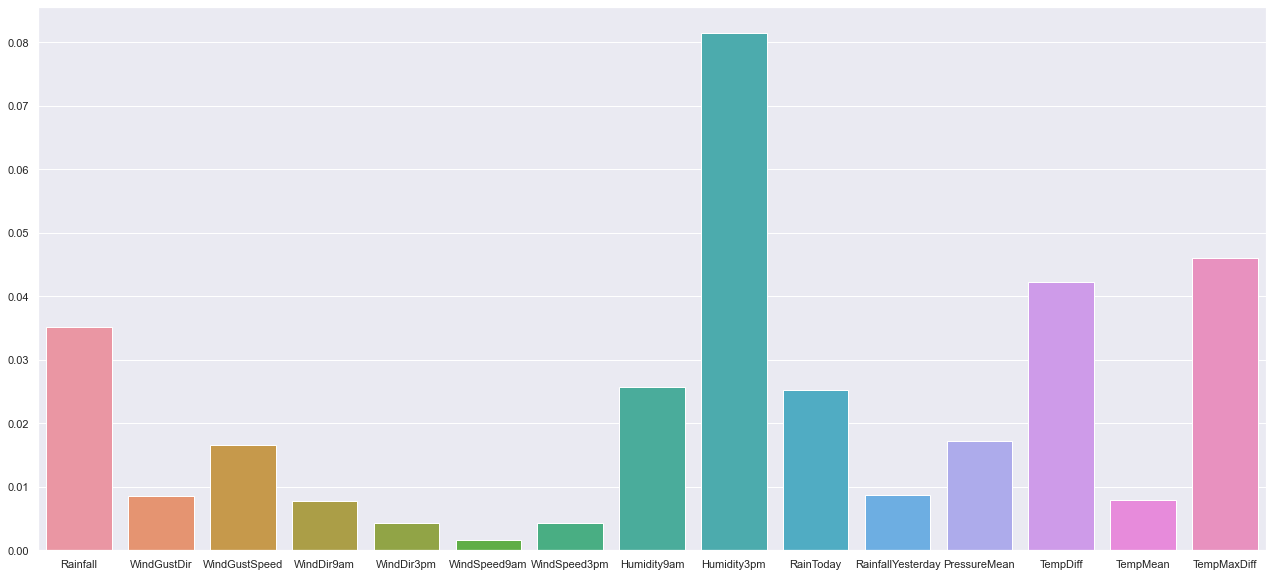

In [55]:
X_train_mi, mi = select_features_mi(X_train[mi_cols], X_train['RainTomorrow'])
plt.figure(figsize=(22,10))
sns.barplot(x=X_train[mi_cols].columns.values,y=mi.scores_);

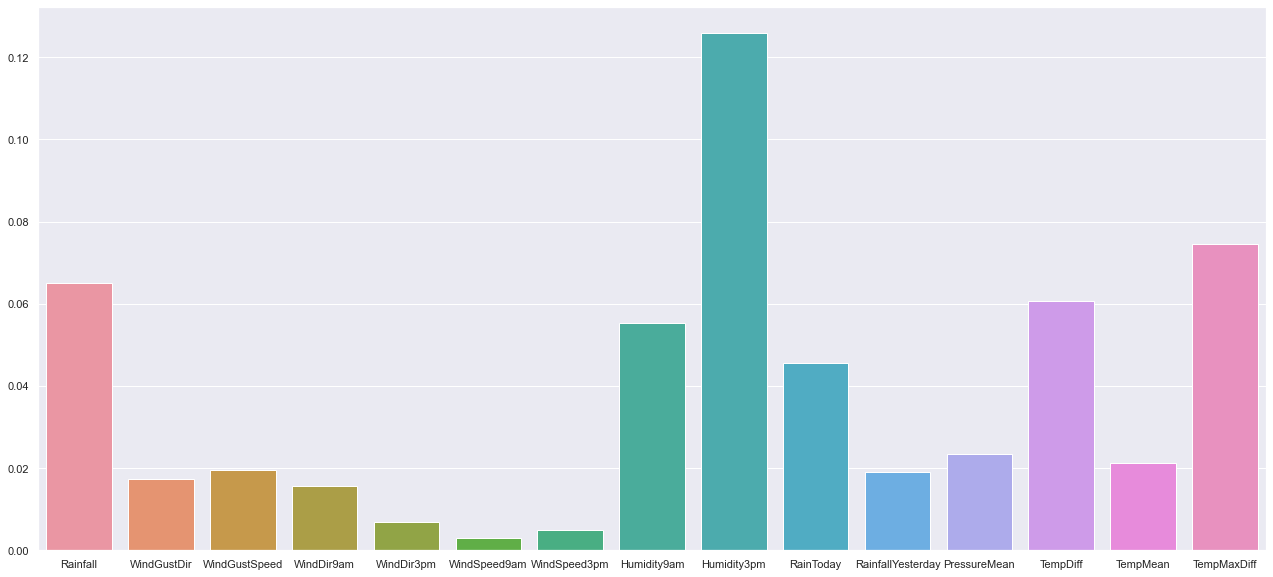

In [56]:
mi = select_features_continouos(X_train[mi_cols], X_train['RainfallTomorrow'])
plt.figure(figsize=(22,10))
sns.barplot(x=X_train[mi_cols].columns.values,y=mi);

In [ ]:
# sns.pairplot(X_train.drop(drop_for_plot,axis=1))